In [256]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Boiler plate
- import all packages
- emulate snakemake so can load config as usual
- load the network you want
TODO: make it easier to restore old runs
TODO: hide all the boiler pates in a file

In [257]:
import logging
import pypsa
import os.path

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

In [258]:
# running the jupyter notebook on the compute nodes doesnt build the path as expected, you have to manually do this
import IPython

working_directory = os.path.dirname(IPython.extract_module_locals()[1]['__vsc_ipynb_file__'])
os.chdir(working_directory)


In [259]:

# from make_summary import assign_carriers
from _helpers import configure_logging, mock_snakemake
from constants import PLOT_COST_UNITS, PLOT_CAP_UNITS,PLOT_SUPPLY_UNITS

logger = logging.getLogger(__name__)


In [260]:
PLANNING_YEAR = 2060
snakemake = mock_snakemake(
    "plot_network",
    snakefile_path=os.path.abspath("../"),
    topology="current+FCG",
    pathway="exp175",
    planning_horizons=PLANNING_YEAR,
    heating_demand="positive",
)

configure_logging(snakemake, logger=logger)
config = snakemake.config
tech_colors = config["plotting"]["tech_colors"]


ntw_path = snakemake.input.network
# ntw_path = "my_results""
# ntw_path = f"/home/ivanra/downloads/PaperResultsXiaowei_networks/postnetwork-ll-current+Neighbor-exponential175-{PLANNING_YEAR}.nc"
n = pypsa.Network(ntw_path)


2025-02-21 16:46:06,571 - _helpers.py - INFO - =========== NEW RUN ===========
2025-02-21 16:46:06,571 - _helpers.py - INFO - =========== NEW RUN ===========
2025-02-21 16:46:06,571 - _helpers.py - INFO - =========== NEW RUN ===========


INFO:__main__:=========== NEW RUN ===========
INFO:pypsa.io:Imported network ntwk_2060.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores


### Fix network for plotting // add missing info

In [261]:
from _plot_utilities import fix_network_names_colors, determine_plottable
from plot_network import plot_cost_map, plot_map
fix_network_names_colors(n, config)
determine_plottable(n)

/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/_plot_utilities.py:169: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.carriers.color.fillna(NAN_COLOR, inplace=True)


# Plot maps

### plot capex

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:183: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:337: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


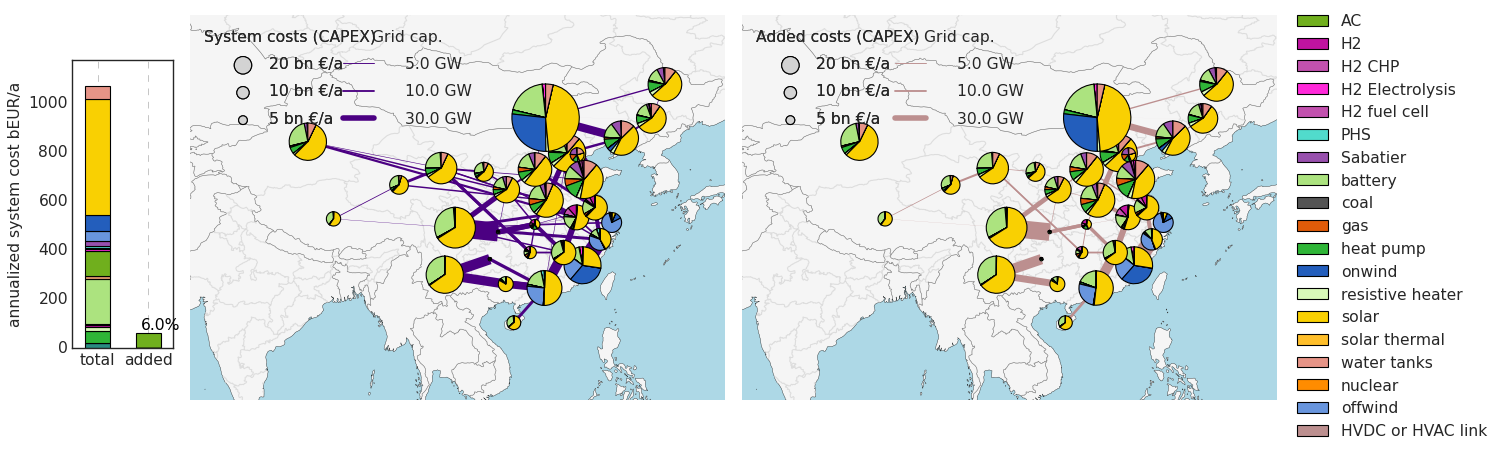

In [262]:
ax = plot_cost_map(n, config["plotting"], cost_pannel=True, capex_only=True)

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:183: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:337: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


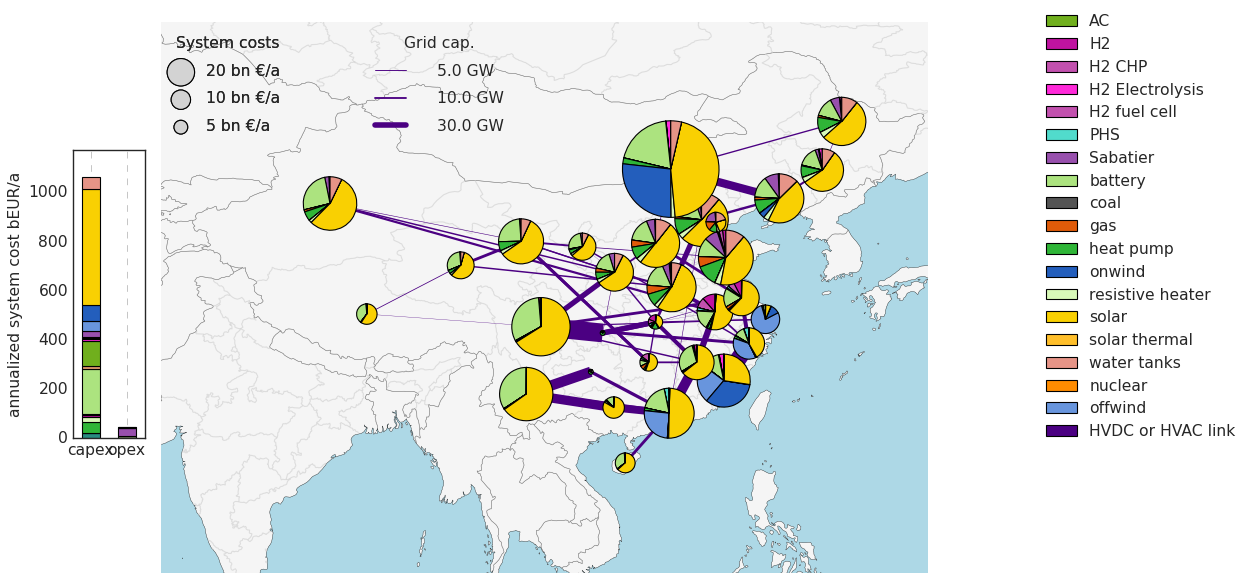

In [263]:
# TODO fix layout
ax = plot_cost_map(n, config["plotting"], cost_pannel=True, plot_additions=False, capex_only=False)

## plot electricy generation map

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:492: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:453: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


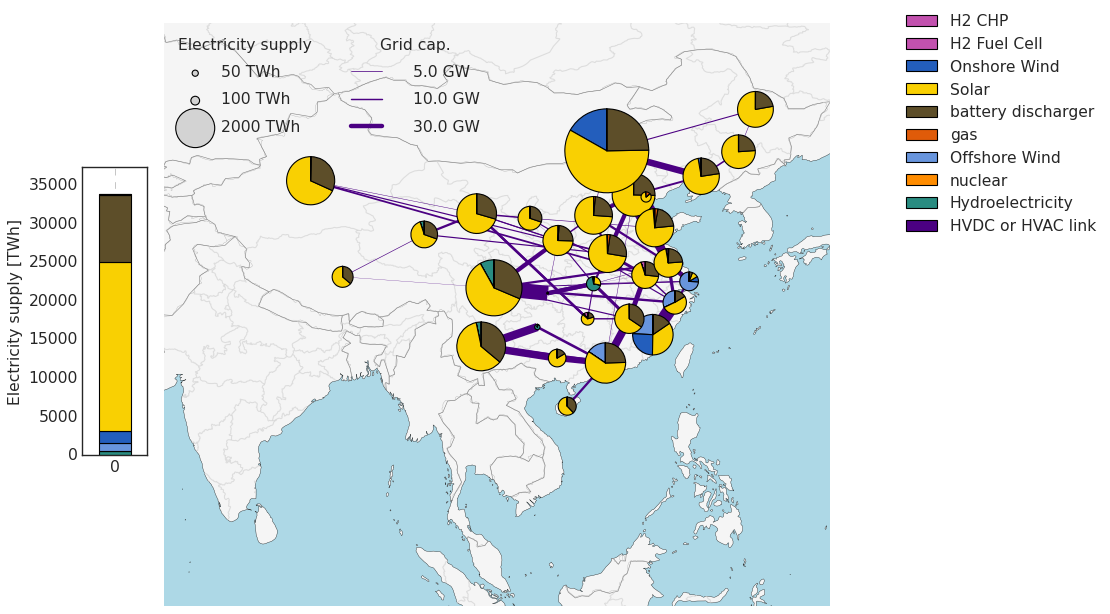

In [264]:
from plot_network import plot_energy_map
from _plot_utilities import set_plot_style
set_plot_style(
    style_config_file= os.path.abspath("../../config/plotting_styles/network_map.mplstyle"),
    base_styles=["classic", "seaborn-v0_8-white"],
)
plot_energy_map(n,config["plotting"], carrier="AC", components = ["Generator", "Link"])

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:492: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:453: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


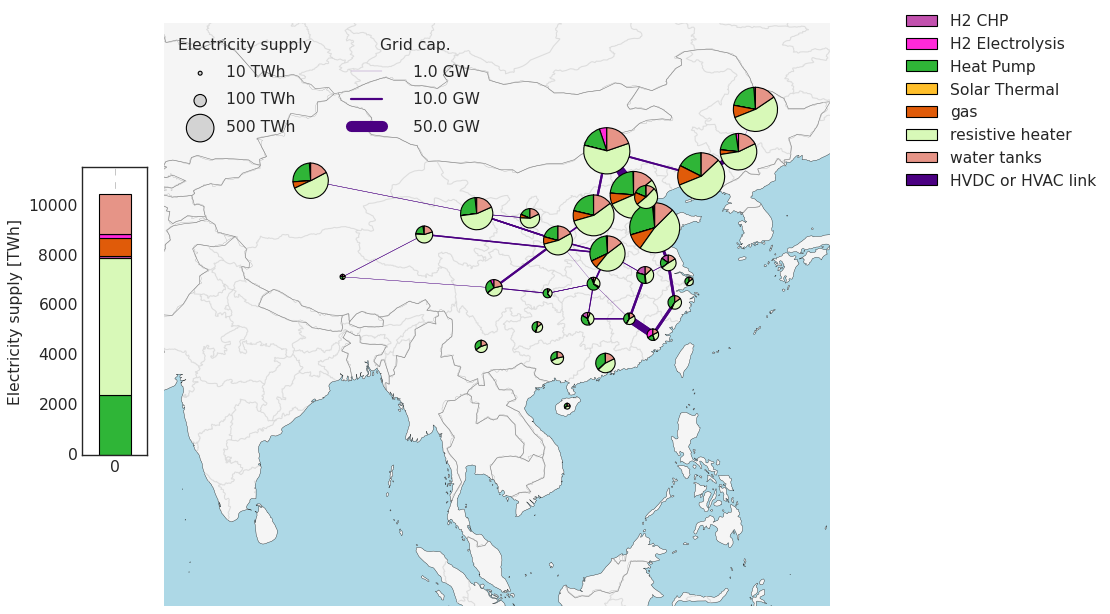

In [265]:
from plot_network import plot_energy_map
from _plot_utilities import set_plot_style
set_plot_style(
    style_config_file= os.path.abspath("../../config/plotting_styles/network_map.mplstyle"),
    #snakemake.config["plotting"]["network_style_config_file"],
    base_styles=["classic", "seaborn-v0_8-white"],
)
plot_energy_map(n,config["plotting"], carrier="heat", components = ["Generator", "Link"])

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


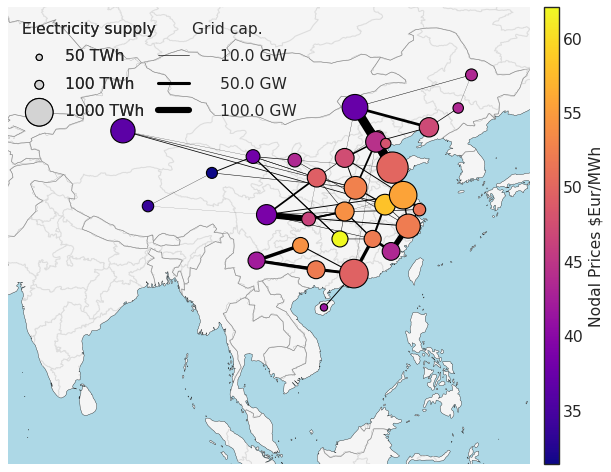

In [266]:
from plot_network import plot_nodal_prices
plot_nodal_prices(n, config["plotting"], "AC")

## plot capacity

## plot cost

### Plot nodal prices

## Interactive plot map

In [267]:

import numpy as np
# make names and link sizes, make sure we only plot AC, DC & statiosn
ac_links = n.links[n.links.carrier == "AC"]
colors = n.links.index.to_series().apply(lambda x: 'black' if 'ext' in x else 'pink')
widths = np.log(n.links.p_nom_opt + 3) / 2
widths[~widths.index.isin(ac_links.index)] = 0
widths[widths.index.str.contains('reversed')] = 0
names = n.links.copy()
names["name"] = names.index.values
names.loc[~names.index.isin(ac_links.index), "p_nom_opt"] = ""
names.loc[~names.index.isin(ac_links.index), "name"] = ""
buses = n.buses.copy()
buses["name"] = buses.apply(lambda x: f"{x.name}" if x.carrier == "AC" or x.carrier=="stations" else "", axis=1)
buses["sizes"] = buses.apply(lambda x:10 if x.carrier == "AC" or x.carrier=="stations" else 0, axis=1)
buses["colors"] = buses.apply(lambda x: "black" if x.carrier == "AC" else "red", axis=1)
buses.carrier.unique()
ax = n.iplot(link_colors=colors, link_widths=widths, link_text = names.p_nom_opt.astype(str) + names.name, bus_text=buses.name, bus_sizes=buses.sizes, bus_colors=buses.colors)

/p/tmp/ivanra/anaconda/ipykernel_2247935/1096144582.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  names.loc[~names.index.isin(ac_links.index), "p_nom_opt"] = ""


### extendable lines

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


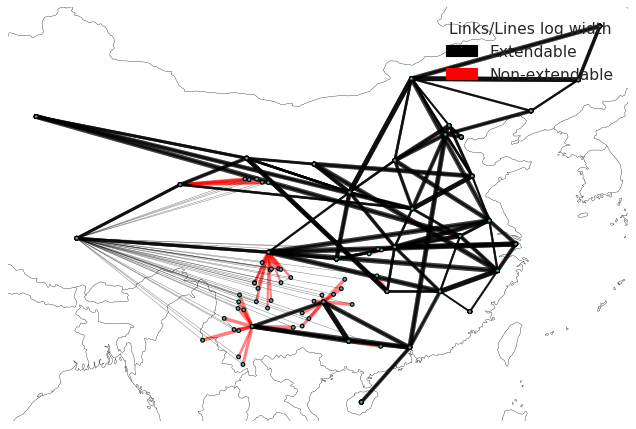

In [268]:

fig, ax = plt.subplots(1, 1, figsize=(10, 10),subplot_kw={"projection":ccrs.PlateCarree()})
def width(x):
    return np.log10(x/1e6).where(x>1,0)
n.plot(ax = ax,link_colors=n.links.p_nom_extendable.apply(lambda x: "red" if not x else "black"),line_colors=n.lines.s_nom_extendable.apply(lambda x: "red" if not x else "black"), link_widths= width(n.links.p_nom_opt) , line_widths=width(n.lines.s_nom_opt), link_alpha=0.5)
# Create custom legend
import matplotlib.patches as mpatches
extendable_patch = mpatches.Patch(color='black', label='Extendable')
non_extendable_patch = mpatches.Patch(color='red', label='Non-extendable')
ax.legend(handles=[extendable_patch, non_extendable_patch], title = "Links/Lines log width")

# Shadow prices & prices

In [269]:
from make_summary import make_summaries
summaries = make_summaries({("exp175-paper", PLANNING_YEAR):ntw_path})

INFO:make_summary:Make summary for scenario ('exp175-paper', 2060), using /p/tmp/ivanra/PyPSA-China-PIK/results/v-0.2.0_new_load_overnight_1hr_res_clippedrasters/overnight_pthw-exp175_topo-current+FCG_proj-positive/postnetworks/ntwk_2060.nc


INFO:pypsa.io:Imported network ntwk_2060.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/make_summary.py:440: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  .groupby(n.generators.loc[gens, "bus"], axis=1)
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/make_summary.py:440: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  .groupby(n.generators.loc[gens, "bus"], axis=1)
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/make_summary.py:440: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  .groupby(n.generators.loc[gens, "bus"], axis=1)
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/make_summary.py:447: RuntimeWarning: invalid value encountered in scalar divide
  market_values.at[tech, label] = revenue.sum().sum() / dispat

# CO2 emissions

In [270]:
n.global_constraints

type  investment_period carrier_attribute sense  \
GlobalConstraint                                                              
co2_limit         primary_energy                NaN     co2_emissions    <=   

                  constant           mu  
GlobalConstraint                         
co2_limit              0.0 -1011.511412

<Axes: xlabel='snapshot'>

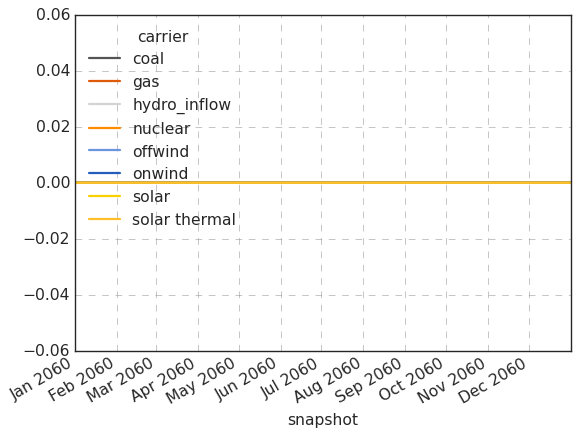

In [271]:
fig, ax = plt.subplots()
# calc the t resolved CO2 emissions from generators
time_res_emissions = ((n.generators_t.p/ n.generators.efficiency)* n.generators.carrier.map(n.carriers.co2_emissions)).T.groupby(n.generators.carrier).sum()
colors = time_res_emissions.T.columns.map(tech_colors).fillna("lightgrey")
time_res_emissions.T.plot(ax =ax, color =  colors, legend = True)

Text(0, 0.5, 'cum CO2 emissions [t]')

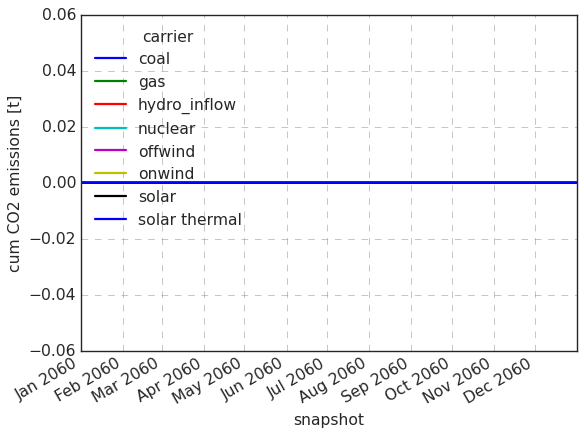

In [272]:
gen_emissions = ((n.generators_t.p/ n.generators.efficiency)* n.generators.carrier.map(n.carriers.co2_emissions)).T.groupby(n.generators.carrier).sum().T.cumsum()
fig, ax = plt.subplots()
gen_emissions.where(gen_emissions>=0).dropna(axis=1, how="all").plot(ax=ax)
ax.set_ylabel("cum CO2 emissions [t]")


Overnight model does not have CO2 capture or biomass stores, skipped


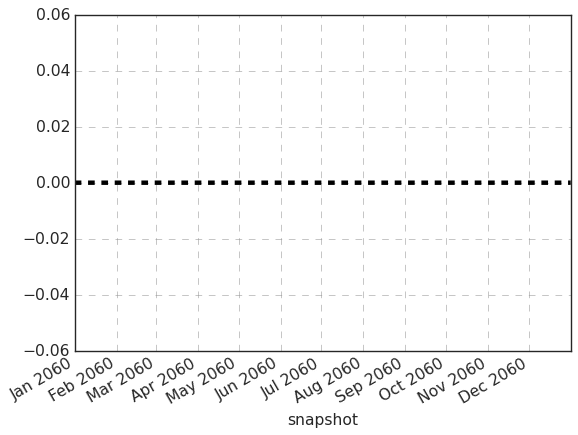

In [273]:
try:
    fig, ax = plt.subplots()
    # calc the t resolved CO2 emissions from generators
    ((n.generators_t.p/ n.generators.efficiency)* n.generators.carrier.map(n.carriers.co2_emissions)).T.groupby(n.generators.carrier).sum().sum().T.cumsum().plot(ax =ax, label = "CO2 emissions (cum)", lw=4, c ="black", ls = "--")
    n.stores_t.e.T.groupby(n.stores.carrier).sum().loc[["CO2","H2", "CO2 capture", "gas", "biomass"]].T.plot(lw=4, cmap ="jet", ax =ax)
    ax.legend()
    ax.semilogy()
    ax.set_ylim(1e3,1e10)
    ax.set_ylabel("carrier stock")
except KeyError:
    print("Overnight model does not have CO2 capture or biomass stores, skipped")

## CO2 capture
! beware the store is the difference :)

In [274]:
try:
    stores = n.stores_t.e.T.groupby(n.stores.carrier).sum()
    diff = stores.iloc[:, -1] -stores.iloc[:, 0]
    co2_cap = stores.iloc[:, -1].loc[["CO2 capture"]].sum()
    co2_cap
except KeyError:
    print("Overnight model does not have CO2 capture or biomass stores, skipped")


Overnight model does not have CO2 capture or biomass stores, skipped


<Axes: xlabel='snapshot'>

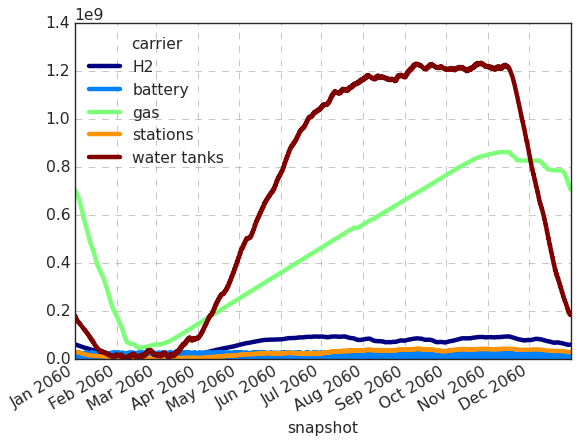

In [275]:
n.stores_t.e.T.groupby(n.stores.carrier).sum().T.plot(lw=4, cmap ="jet")

# plot time series

### Prices

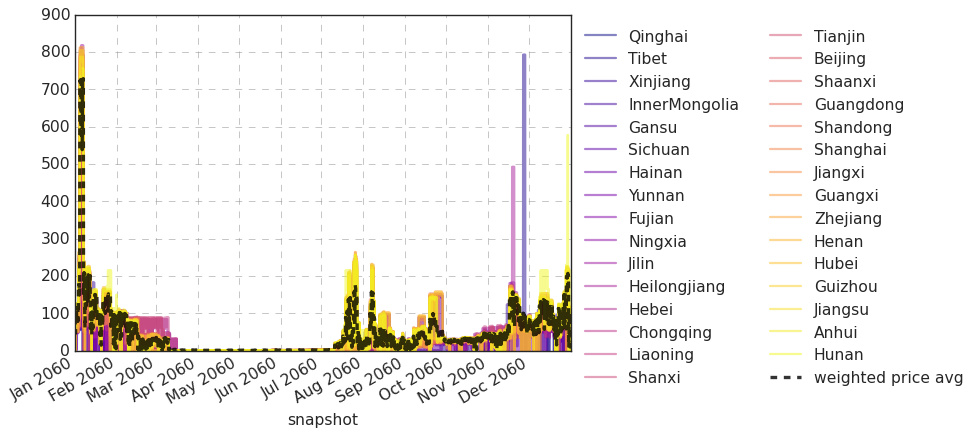

In [356]:
from constants import PROV_NAMES 
marginal_price_series = n.buses_t["marginal_price"][PROV_NAMES]
prov_max_price_series = marginal_price_series.T.max()
prov_min_price_series = marginal_price_series.T.min()
spread = marginal_price_series.T.max()-marginal_price_series.T.min()
load_ac = n.statistics.withdrawal(bus_carrier="AC", aggregate_time=False, groupby="location", comps = "Load")

regional_weighed_price = marginal_price_series.T.mul(load_ac).T.sum()/load_ac.T.sum()
order =regional_weighed_price.sort_values().index

weighed_prices = (marginal_price_series.T.mul(load_ac)/load_ac.sum()).sum()
ax = marginal_price_series[order].plot(alpha=0.5, lw=2, legend=False, cmap="plasma")
weighed_prices.plot(ax = ax, lw=3, c="black", label = "weighted price avg", alpha =0.8, ls = "--")
ax.legend(  loc='upper left', bbox_to_anchor=(1, 1), ncols=2)

In [277]:
from plot_time_series import plot_energy_balance

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


Text(0.5, 1.0, 'Electricity Balance')

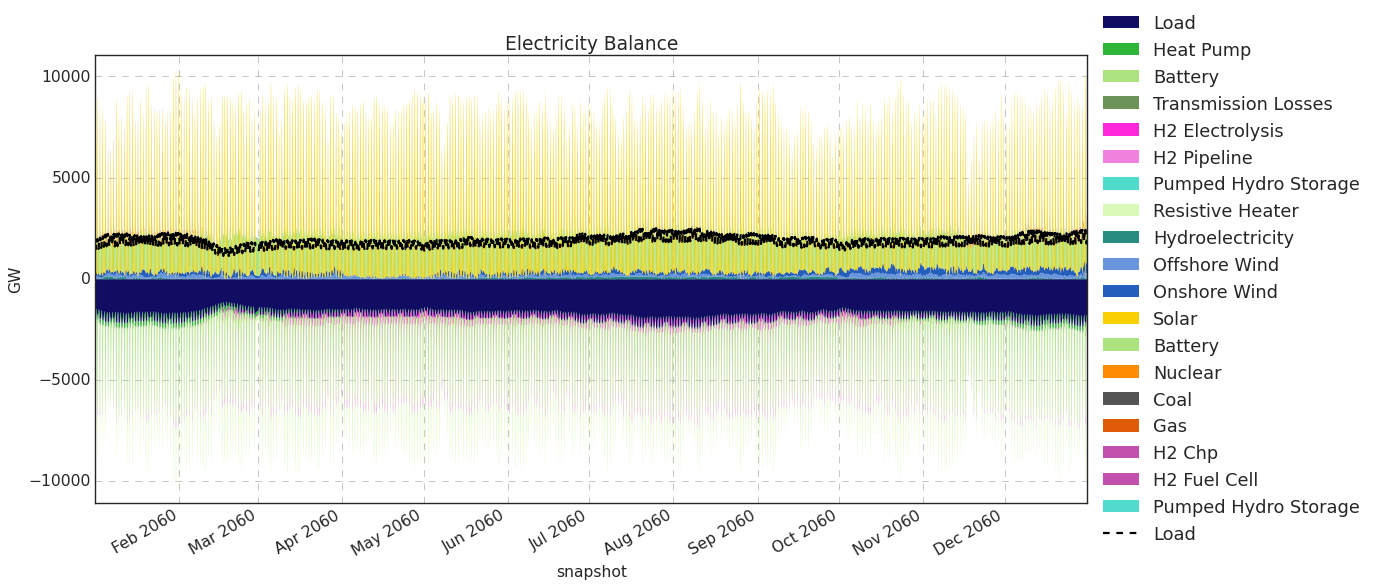

In [278]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-01-01 01:00", end_date=f"{PLANNING_YEAR}-12-31 12:00:00")
ax.grid(axis='y')
ax.set_title("Electricity Balance")

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


Text(0.5, 1.0, 'Electricity Balance')

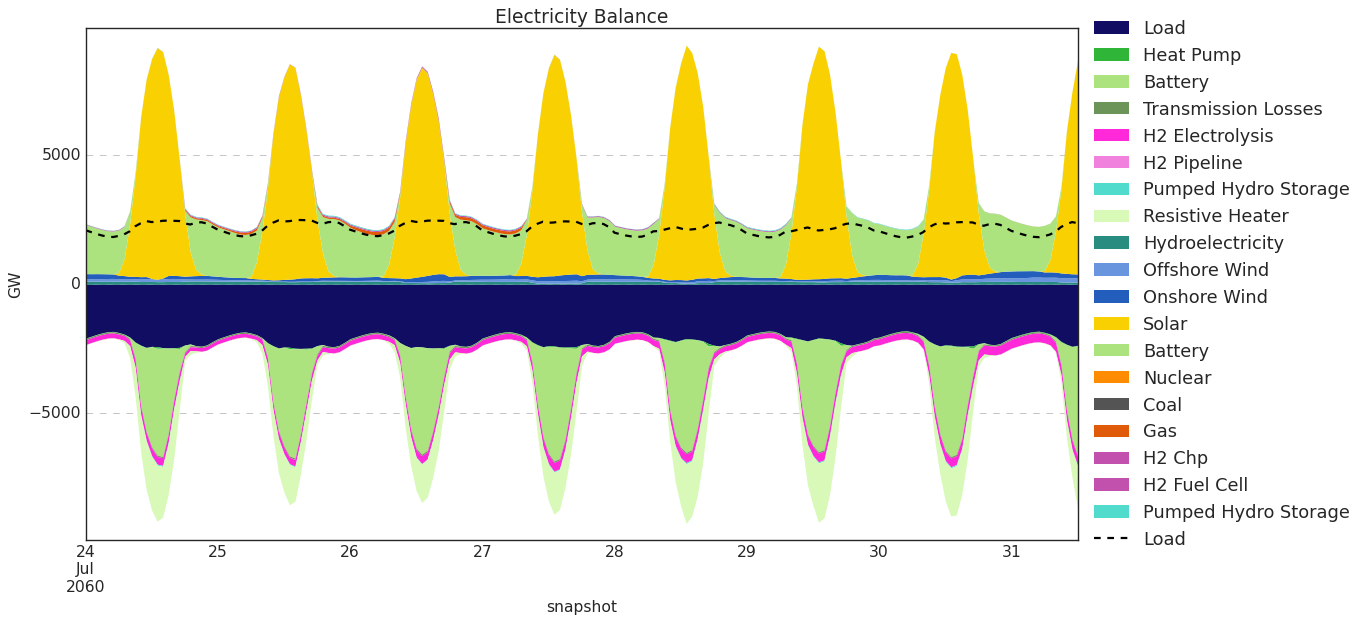

In [279]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-07-24 00:00", end_date=f"{PLANNING_YEAR}-07-31 12:00:00")
ax.grid(axis='y')
ax.set_title("Electricity Balance")

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


Text(0.5, 1.0, 'Electricity Balance')

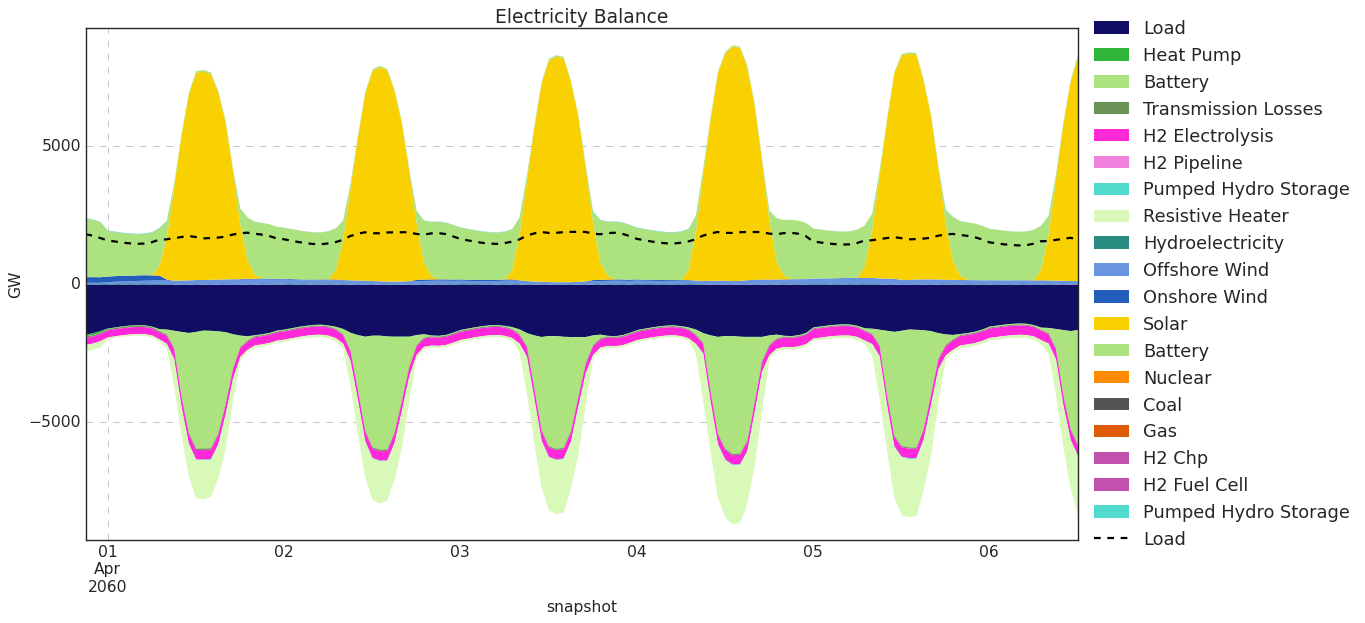

In [280]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-03-31 21:00", end_date=f"{PLANNING_YEAR}-04-06 12:00:00")
ax.grid(axis='y')
ax.set_title("Electricity Balance")

In [281]:
n.statistics.revenue(comps="Load", bus_carrier = "AC")

carrier
-   -7.803160e+11
Name: objective, dtype: float64

## price series

2060-11-27 22:00:00 2060-01-06 20:00:00
calculated prices


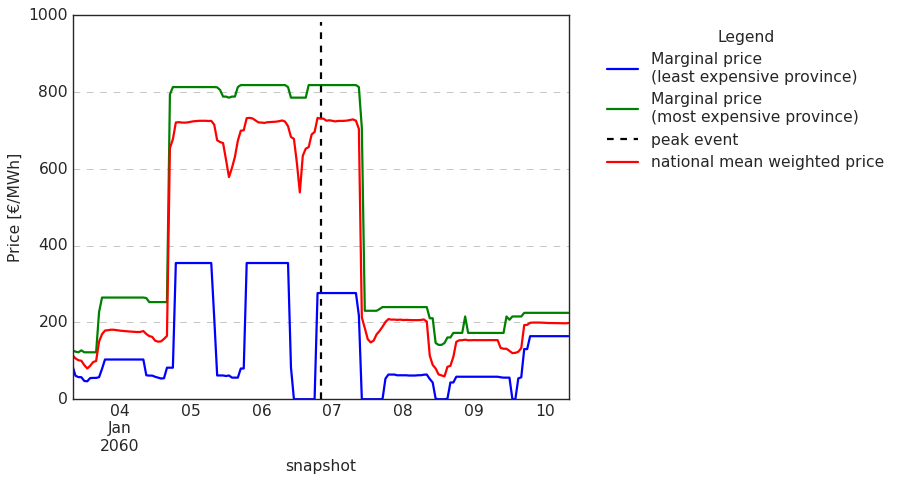

In [ ]:
from _plot_utilities import find_weeks_of_interest

winter_week, summer_week = find_weeks_of_interest(n, f"{PLANNING_YEAR}-06-01", f"{PLANNING_YEAR}-10-06")
marginal_price_series = n.buses_t["marginal_price"][PROV_NAMES]
prov_max_price_series = marginal_price_series.T.max()
prov_min_price_series = marginal_price_series.T.min()
spread = marginal_price_series.T.max()-marginal_price_series.T.min()
load_ac = n.statistics.withdrawal(bus_carrier="AC", aggregate_time=False, groupby="location", comps = "Load")
weighed_prices = (marginal_price_series.T.mul(load_ac)/load_ac.sum()).sum()
print("calculated prices")

ax = prov_min_price_series.loc[summer_week].plot(label = "Marginal price\n(least expensive province)")
prov_max_price_series.loc[summer_week].plot(label = "Marginal price\n(most expensive province)", ax =ax)
# spread.loc[summer_week].plot(label = "Price spread", ax =ax, ls= "--")
ax.set_ylabel("Price [€/MWh]")
# ax.vlines(winter_week[len(winter_week)//2], 0,prov_max_price_series.max()*1.2, color="black", ls = "--", label="peak event")
ax.vlines(summer_week[len(summer_week)//2], 0,prov_max_price_series.max()*1.2, color="black", ls ="--", label="peak event")

weighed_prices.loc[summer_week].plot(ax=ax, label ="national mean weighted price")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Legend")

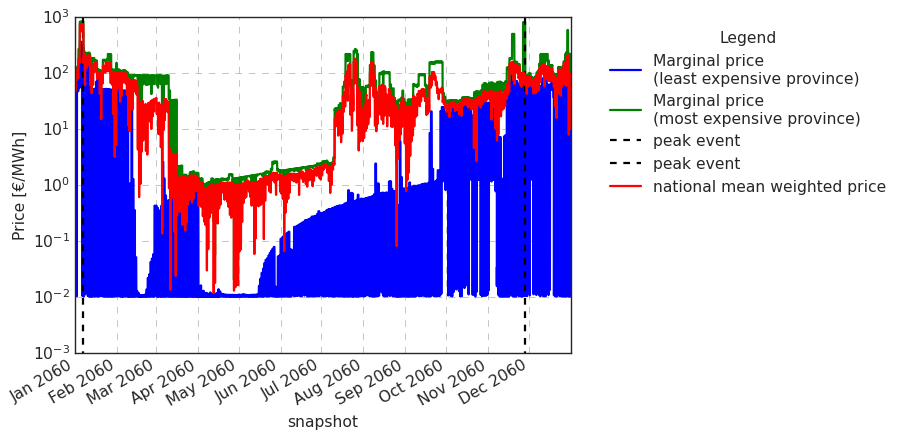

In [283]:

ax = prov_min_price_series.plot(label = "Marginal price\n(least expensive province)", logy=True)
ax = prov_max_price_series.plot(label = "Marginal price\n(most expensive province)", logy=True)
ax.set_ylabel("Price [€/MWh]")
ax.vlines(winter_week[len(winter_week)//2], 0,prov_max_price_series.max()*1.2, color="black", ls = "--", label="peak event")
ax.vlines(summer_week[len(summer_week)//2], 0,prov_max_price_series.max()*1.2, color="black", ls ="--", label="peak event")

weighed_prices.plot(ax=ax, label ="national mean weighted price", logy=True)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Legend")

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


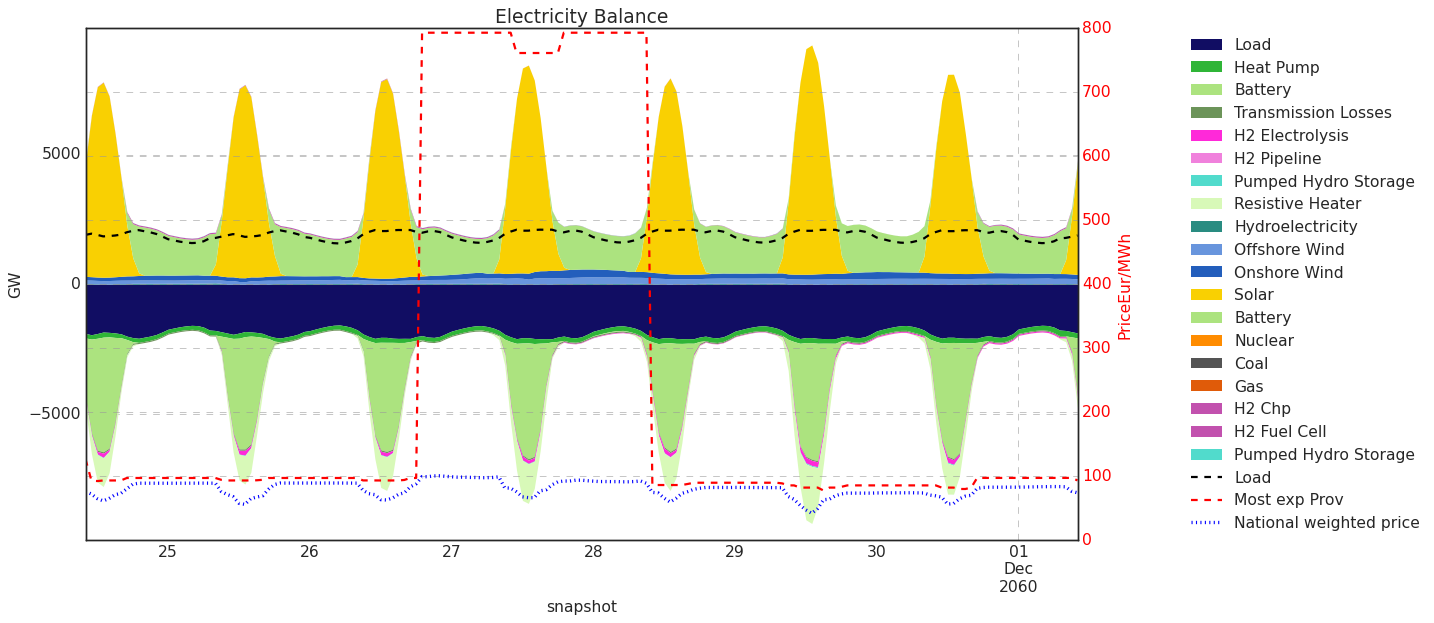

In [284]:
ax = plot_energy_balance(n, config["plotting"], start_date=str(winter_week[0]), end_date=str(winter_week[-1]))
ax.grid(axis='y')
ax.set_title("Electricity Balance")
ax2 = ax.twinx()
prov_max_price_series.loc[winter_week].plot(ax=ax2, color="red", lw=2, ls = "--", label= "Most exp Prov")
weighed_prices.loc[winter_week].plot(ax=ax2, color = "blue", lw=3, ls = ":",label = "National weighted price")
fig = ax.get_figure()
ax2.set_ylabel("PriceEur/MWh", color="red")
ax2.tick_params(axis='y', labelcolor='red')
# Move the existing legend to the right
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc='center left', bbox_to_anchor=(1.1, 0.5))


/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


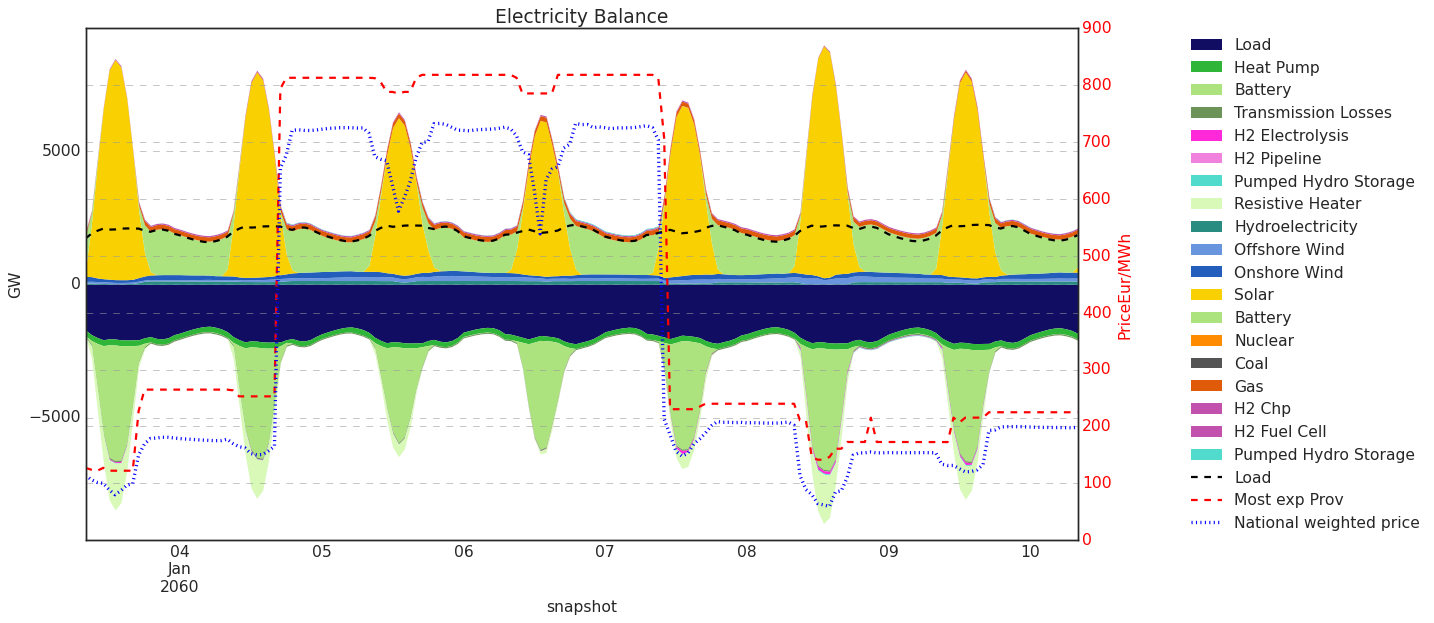

In [285]:
ax = plot_energy_balance(n, config["plotting"], start_date=str(summer_week[0]), end_date=str(summer_week[-1]))
ax.grid(axis='y')
ax.set_title("Electricity Balance")
ax2 = ax.twinx()
prov_max_price_series.loc[summer_week].plot(ax=ax2, color="red", lw=2, ls = "--", label= "Most exp Prov")
weighed_prices.loc[summer_week].plot(ax=ax2, color = "blue", lw=3, ls = ":",label = "National weighted price")
fig = ax.get_figure()
ax2.set_ylabel("PriceEur/MWh", color="red")
ax2.tick_params(axis='y', labelcolor='red')
# Move the existing legend to the right
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc='center left', bbox_to_anchor=(1.1, 0.5))


/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


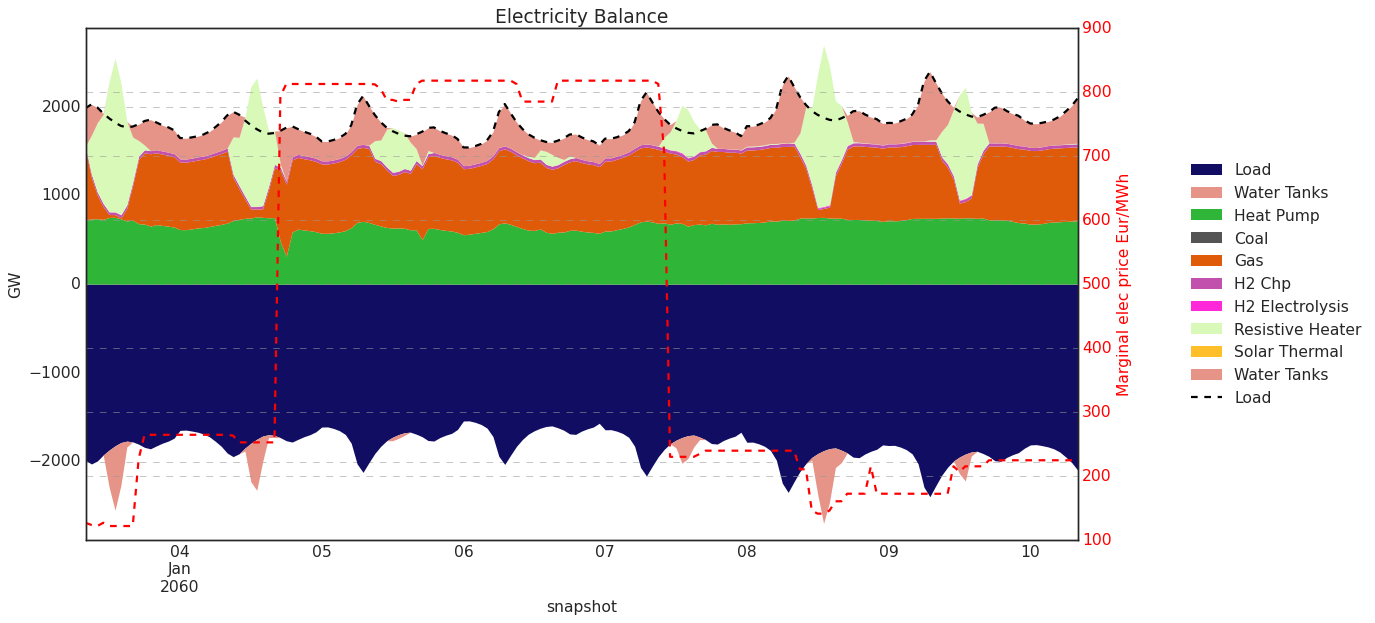

In [286]:
ax = plot_energy_balance(n, config["plotting"], start_date=str(summer_week[0]), end_date=str(summer_week[-1]), bus_carrier = "heat")
ax.grid(axis='y')
ax.set_title("Electricity Balance")
ax2 = ax.twinx()
prov_max_price_series.loc[summer_week].plot(ax=ax2, color="red", lw=2, ls = "--")
fig = ax.get_figure()
ax2.set_ylabel("Marginal elec price Eur/MWh", color="red")
ax2.tick_params(axis='y', labelcolor='red')
# Move the existing legend to the right
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1.1, 0.5))


/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


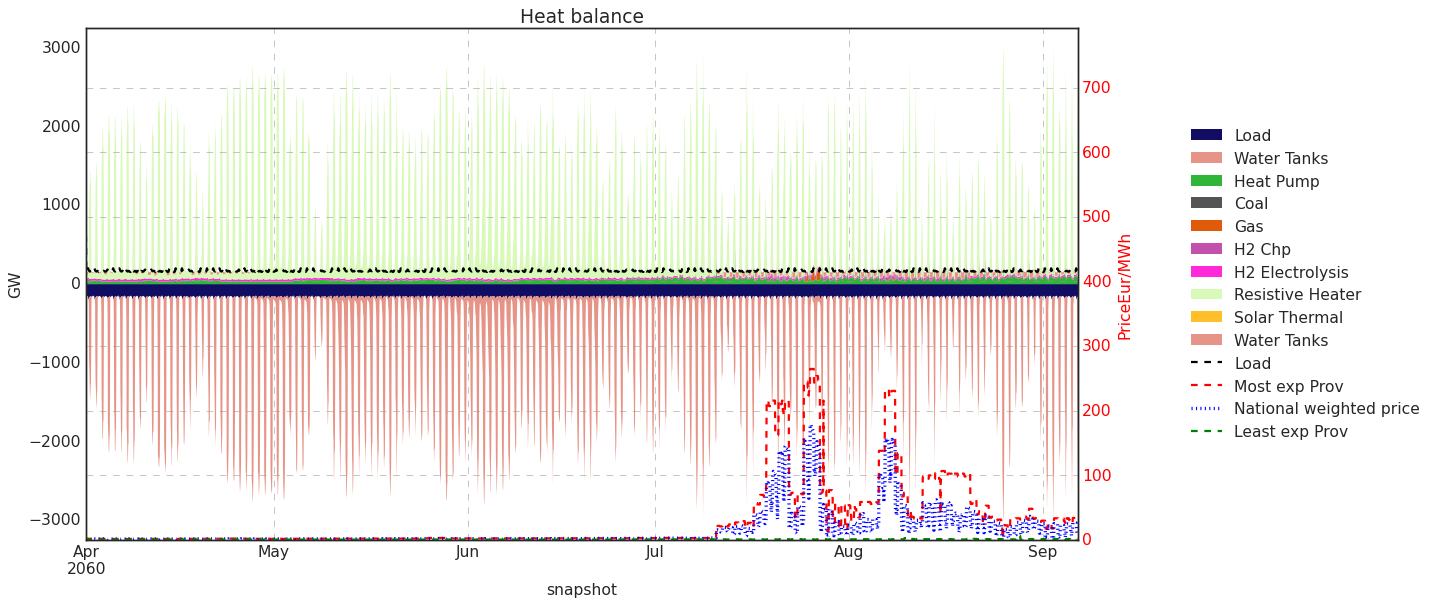

In [287]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-03-31 21:00", end_date=f"{PLANNING_YEAR}-09-06 12:00:00", bus_carrier="heat")
ax.set_title("Heat balance")
ax2 = ax.twinx()
prov_max_price_series.loc[f"{PLANNING_YEAR}-03-31 21:00":f"{PLANNING_YEAR}-09-06 12:00:00"].plot(ax=ax2, color="red", lw=2, ls = "--", label= "Most exp Prov")
weighed_prices.loc[f"{PLANNING_YEAR}-03-31 21:00":f"{PLANNING_YEAR}-09-06 12:00:00"].plot(ax=ax2, color = "blue", lw=3, ls = ":",label = "National weighted price")
prov_min_price_series.loc[f"{PLANNING_YEAR}-03-31 21:00":f"{PLANNING_YEAR}-09-06 12:00:00"].plot(ax=ax2, color="green", lw=2, ls = "--", label= "Least exp Prov")

fig = ax.get_figure()
ax2.set_ylabel("PriceEur/MWh", color="red")
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim([0, prov_max_price_series.loc[f"{PLANNING_YEAR}-03-31 21:00":f"{PLANNING_YEAR}-09-06 12:00:00"].max()*3])
# Move the existing legend to the right
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc='center left', bbox_to_anchor=(1.1, 0.5))


/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


Text(0.5, 1.0, 'Electricity Balance')

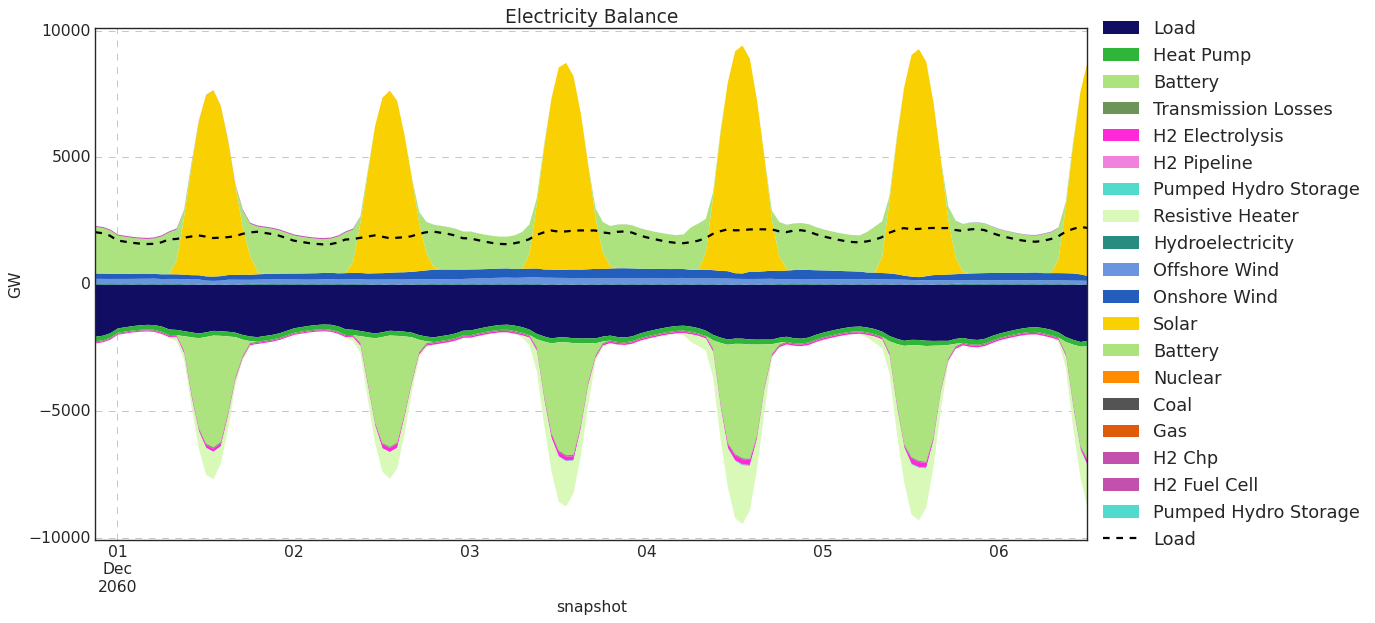

In [288]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-11-30 21:00", end_date=f"{PLANNING_YEAR}-12-06 12:00:00")
ax.grid(axis='y')
ax.set_title("Electricity Balance")

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


Text(0.5, 1.0, 'Heat balance')

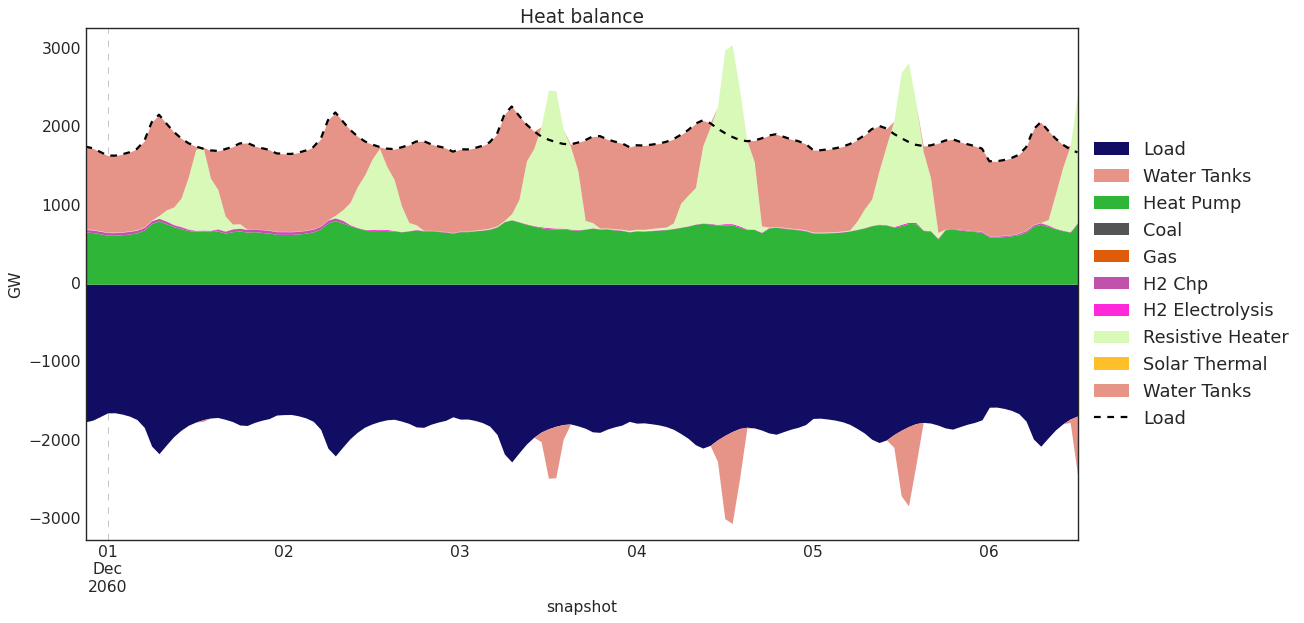

In [289]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-11-30 21:00", end_date=f"{PLANNING_YEAR}-12-06 12:00:00", bus_carrier="heat")
ax.set_title("Heat balance")

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


Text(0.5, 1.0, 'Heat balance')

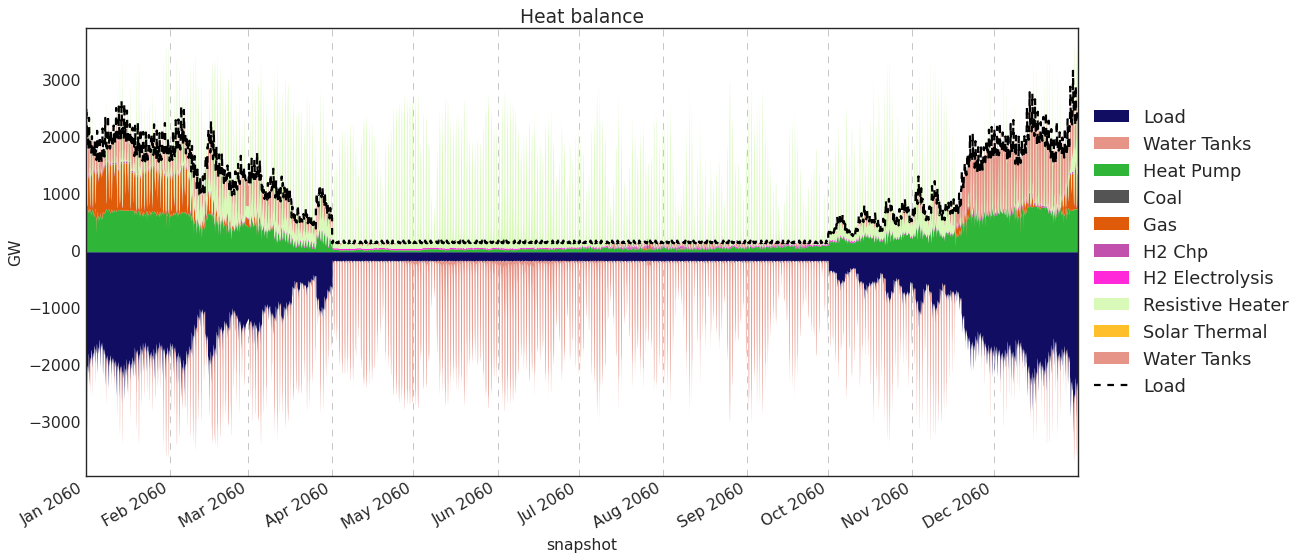

In [290]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-01-01 00:00", end_date=f"{PLANNING_YEAR}-12-31 23:00:00", bus_carrier="heat")
ax.set_title("Heat balance")

<Axes: xlabel='Hours', ylabel='Residual Load [GW]'>

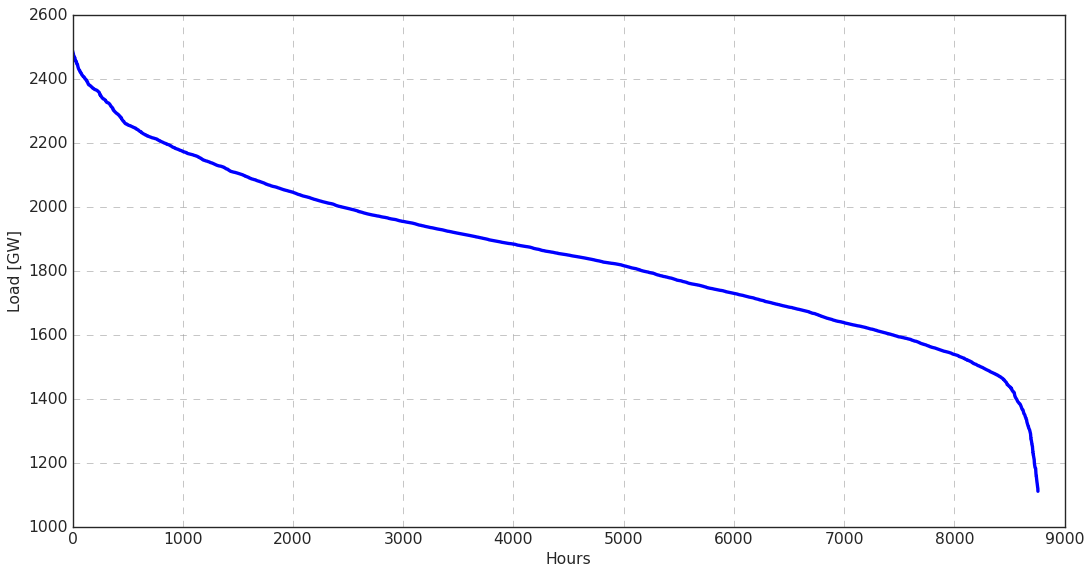

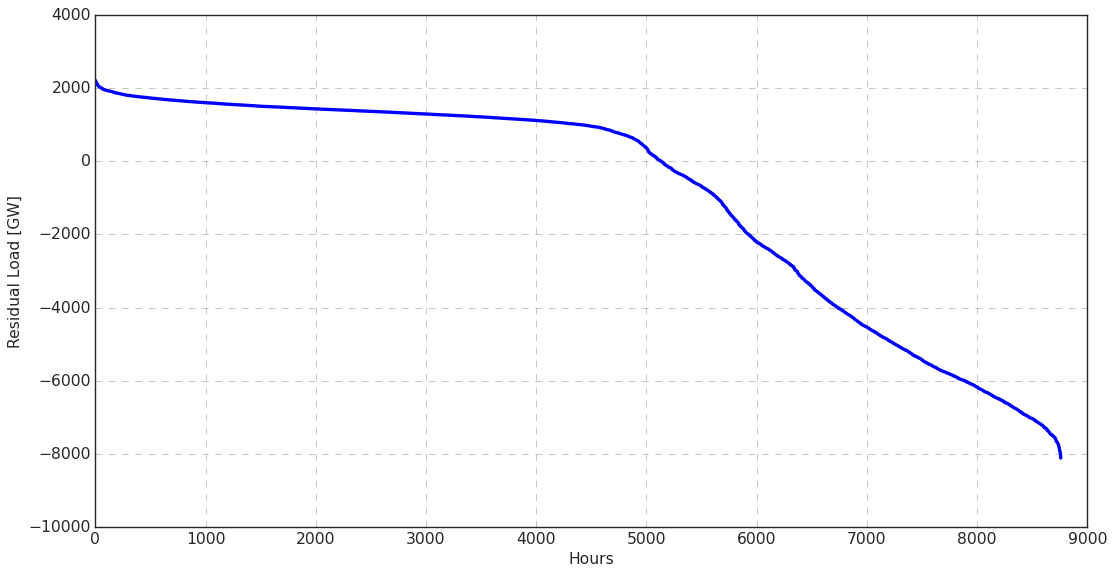

In [291]:
from plot_time_series import plot_residual_load_duration_curve, plot_load_duration_curve

plot_load_duration_curve(n, carrier="AC")
plot_residual_load_duration_curve(n)

In [292]:
(n.statistics.expanded_capex().sum()+n.statistics.opex().sum())

1042966178403.4192

In [293]:
n.objective

1042966178403.0707

<Axes: xlabel='Hours', ylabel='Load [GW]'>

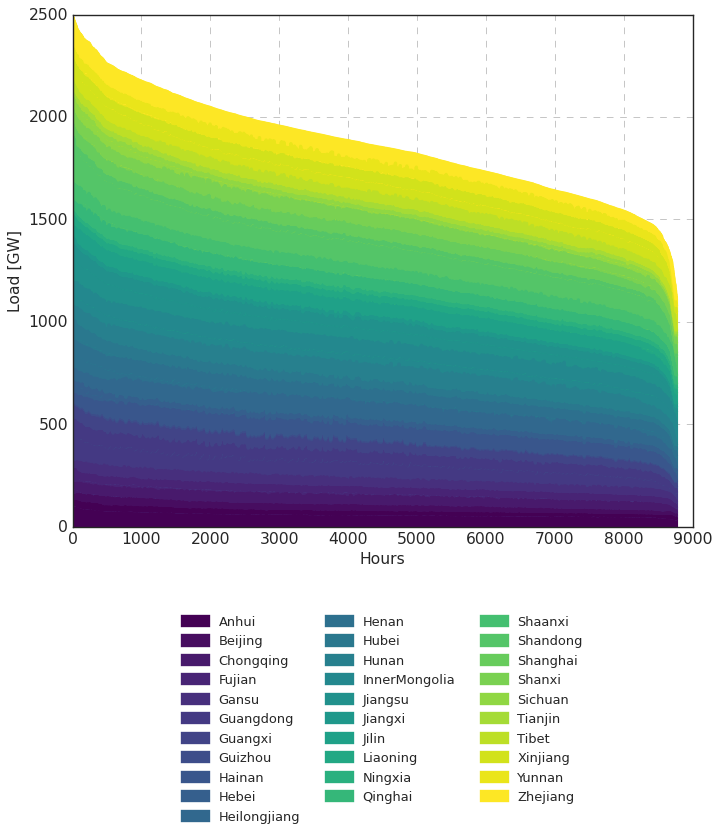

In [294]:
from plot_time_series import plot_regional_load_durations

plot_regional_load_durations(n, carrier="AC", cmap = "viridis")


Text(0, 0.5, 'EnergyDemand / GW')

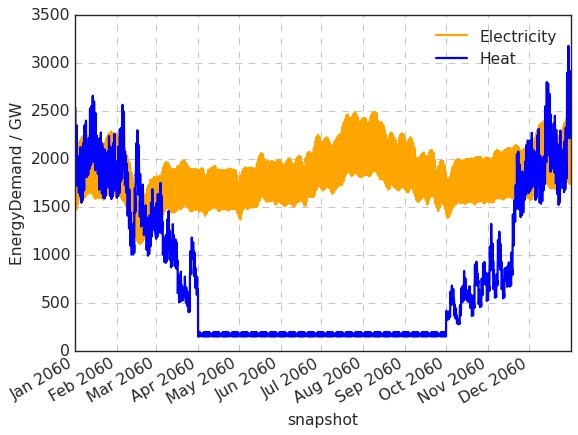

In [295]:
fix, ax = plt.subplots()
ds_AC = n.statistics.withdrawal(bus_carrier="AC", aggregate_time=False).loc[("Load", "-")]/1e3
ds_heat = n.statistics.withdrawal(bus_carrier="heat", aggregate_time=False).loc[("Load", "-")]/1e3
ds_AC.plot(ax=ax, label="Electricity",  c="orange")
ds_heat.plot(ax=ax, label="Heat", c = "blue")
ax.legend()
ax.set_ylabel("EnergyDemand / GW")

## Power flows map

Text(0, 0.5, 'Transmission [TWh]')

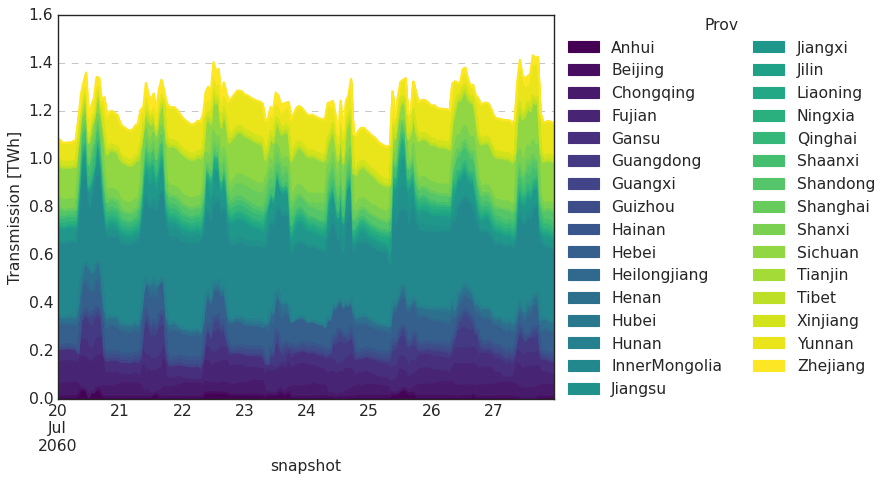

In [296]:
from _helpers import get_location_and_carrier
transmission = n.statistics.transmission(
        bus_carrier="AC",
        groupby=get_location_and_carrier,
        aggregate_time=False,
    )
ax = (
    (transmission/1e6)
    .groupby("location")
    .sum()
    .T.loc[f"{PLANNING_YEAR}-07-20":f"{PLANNING_YEAR}-07-27"]
    .plot.area(stacked=True, cmap="viridis")
)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Prov", ncols=2)
ax.set_ylabel("Transmission [TWh]")

### Plot cap factors time series

In [297]:
capacity_factors = n.statistics.capacity_factor(aggregate_time=False).loc[["Generator"]].droplevel(0).T

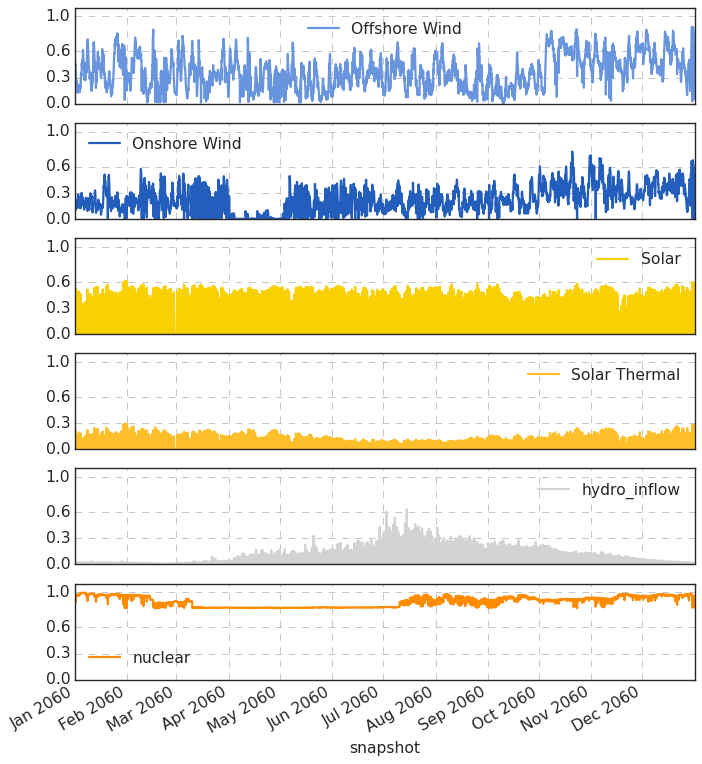

In [298]:
colors_lowered = {k.lower().rstrip():v for k,v in config["plotting"]["tech_colors"].items()}
cap_colors = {k: colors_lowered.get(k.lower().rstrip(), "lightgrey") for k in [c for c in capacity_factors.columns]}
axes = capacity_factors.dropna(axis=1, how="all").fillna(0).plot(subplots=True, figsize=(10,12), color= cap_colors)
for ax in axes:
    ax.set_ylim([0,1.1])
    ax.set_yticks([0,0.3, 0.6,1])

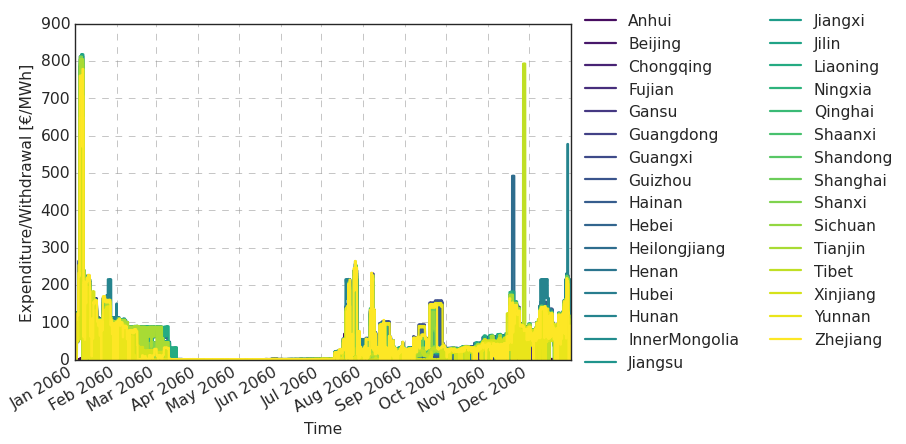

In [299]:
region_rev = n.statistics.revenue(groupby = ["location", "carrier"], bus_carrier="AC", aggregate_time=False).fillna(0)
rev_regional = region_rev[(region_rev<0).all(axis=1)].groupby("location").sum().T
prod_reg = n.statistics.energy_balance(groupby = ["location", "carrier"], bus_carrier="AC", aggregate_time=False)
consum_regional = prod_reg[(prod_reg<0).all(axis=1)].groupby("location").sum().T
supp_regional = prod_reg[(prod_reg>0).all(axis=1)].groupby("location").sum().T
ax = (rev_regional/consum_regional).plot(cmap="viridis")
ax.set_ylabel("Expenditure/Withdrawal [€/MWh]")
ax.set_xlabel("Time")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncols=2)


In [300]:
supp_regional = prod_reg[(prod_reg>0).all(axis=1)].groupby("location").sum().T


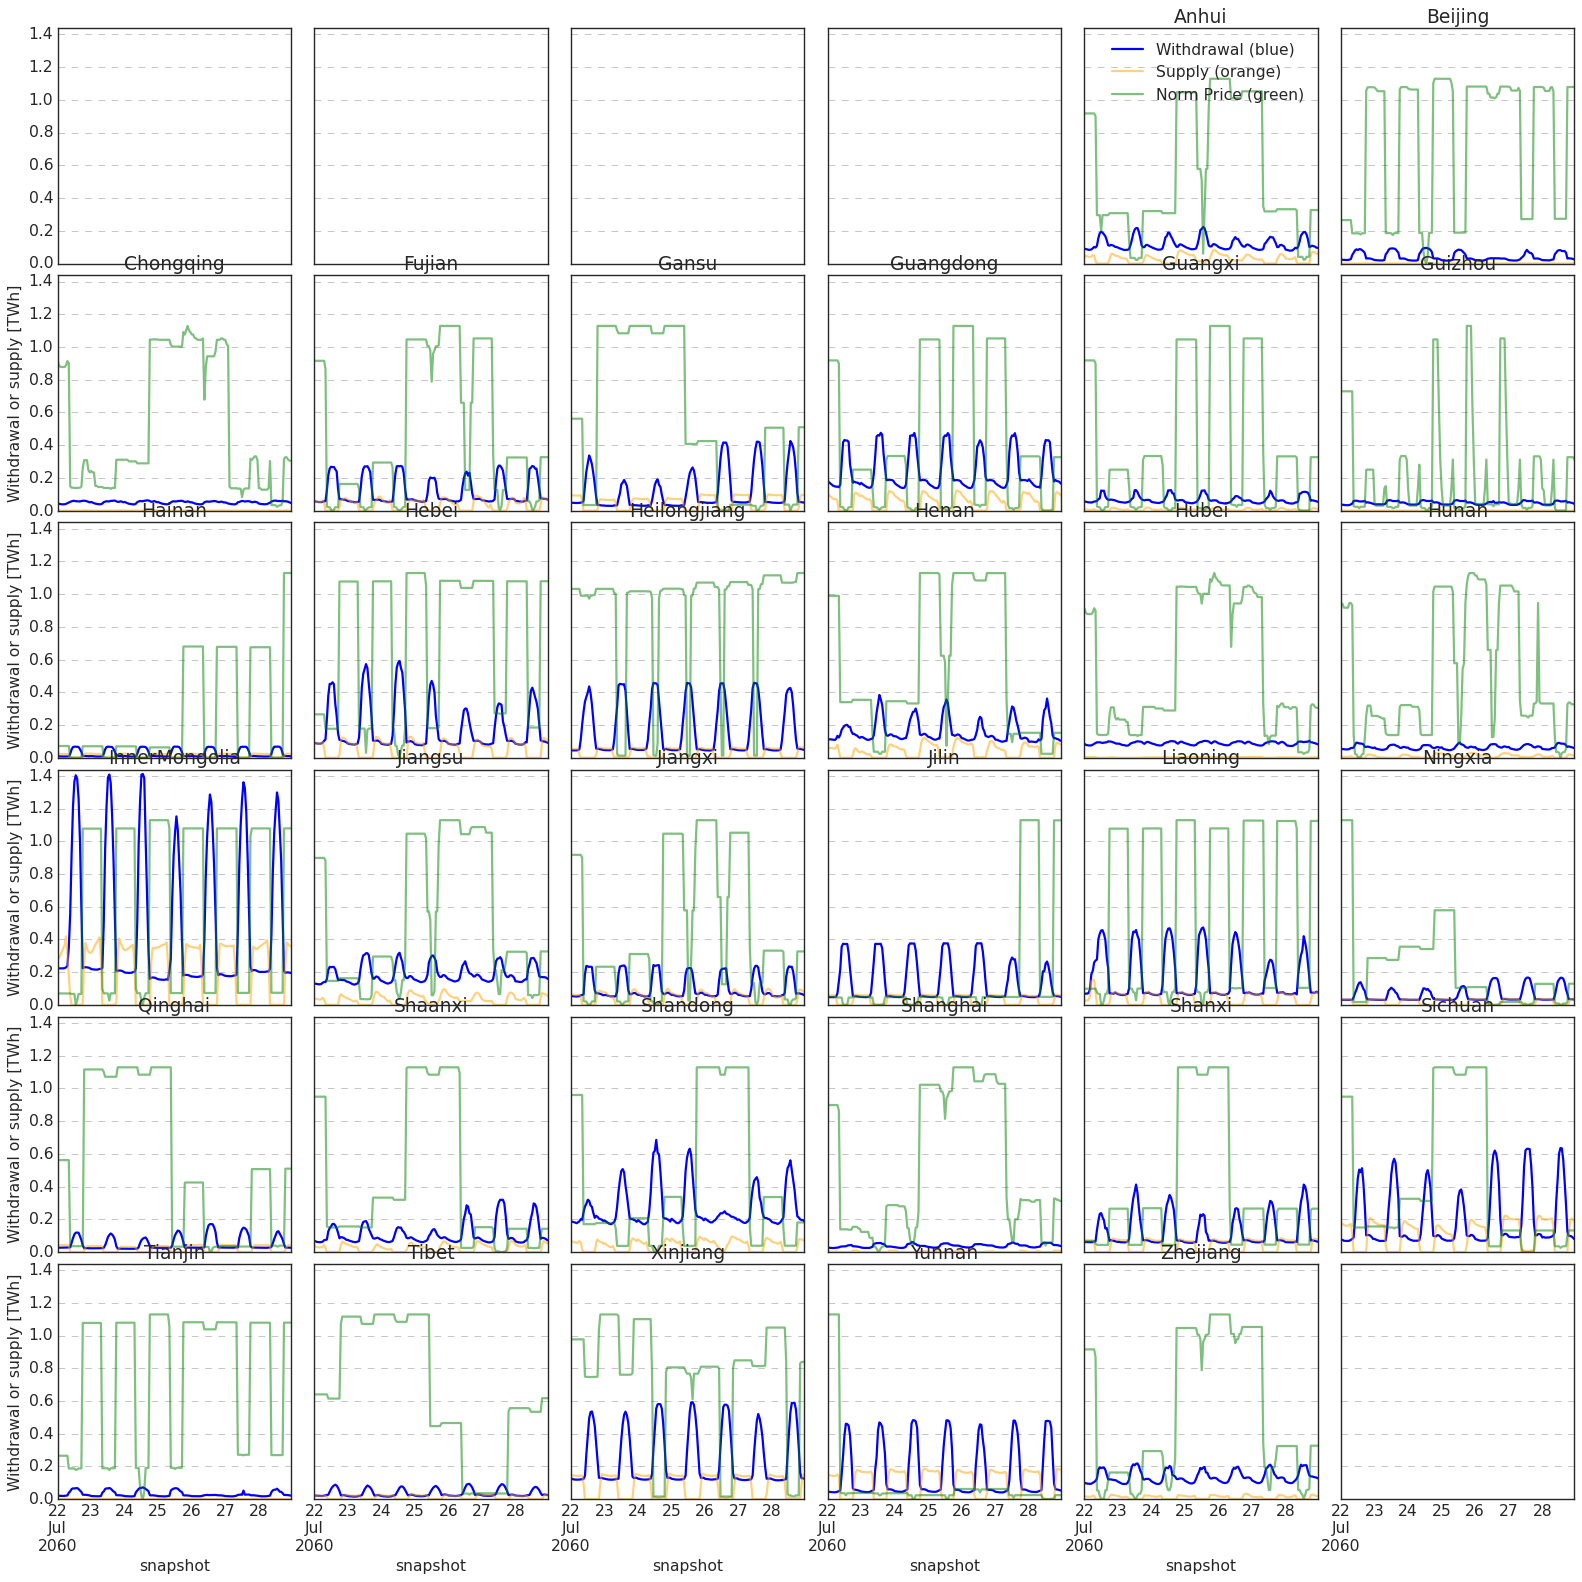

In [301]:

fig, axes = plt.subplots(6,6, sharex=True, sharey=True, figsize=(20,20))
norm_price =  n.buses_t["marginal_price"][PROV_NAMES].loc[f"{PLANNING_YEAR}-07-22":f"{PLANNING_YEAR}-07-28"]
norm_price/= norm_price.max()
norm_price*=(consum_regional*-1e-6).loc[f"{PLANNING_YEAR}-07-22":f"{PLANNING_YEAR}-07-28"].max().max()*0.8
consum_regional = consum_regional[PROV_NAMES]
for i,c in enumerate(consum_regional.columns):
    k, l = (i+4)//6, (i+4)%6
    (consum_regional[c]*-1e-6).loc[f"{PLANNING_YEAR}-07-22":f"{PLANNING_YEAR}-07-28"].plot(ax=axes[k,l])
    (supp_regional[c]*1e-6).loc[f"{PLANNING_YEAR}-07-22":f"{PLANNING_YEAR}-07-28"].plot(ax=axes[k,l], color = "orange", alpha = 0.5)
    norm_price[c].plot(ax=axes[k,l], color = "green", alpha = 0.5, legend = False)
    axes[k,l].set_title(c)
    axes[k,l].set_ylim(0, consum_regional.min().min()*-1e-6)

    if l ==0:
        axes[k,l].set_ylabel("Withdrawal or supply [TWh]")
    if k==0:
        axes[k,l].set_xlabel("Time")
axes[0, 4].legend(["Withdrawal (blue)", "Supply (orange)", "Norm Price (green)"])
fig.tight_layout()
fig.subplots_adjust(hspace=0.05, wspace=0.1)

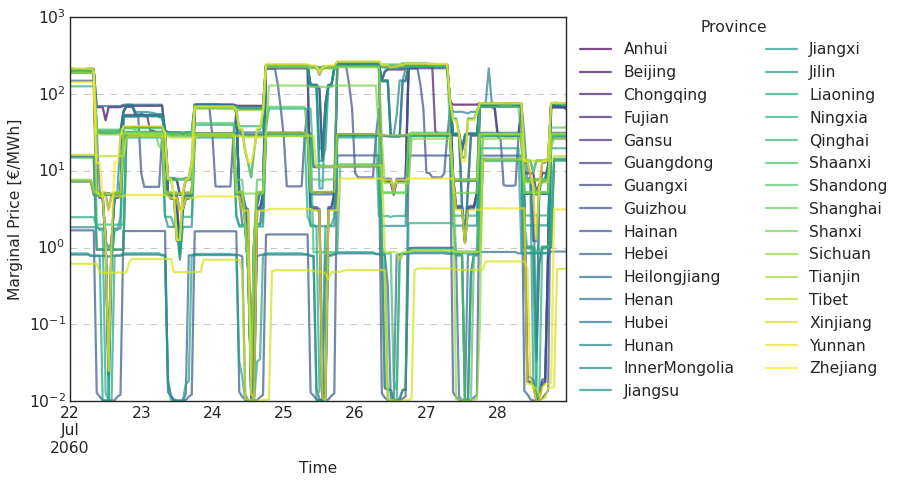

In [302]:
from constants import PROV_NAMES 
ax = n.buses_t["marginal_price"][PROV_NAMES].loc[f"{PLANNING_YEAR}-07-22":f"{PLANNING_YEAR}-07-28"].plot(cmap="viridis",alpha =0.7, logy=True)
ax.set_ylabel("Marginal Price [€/MWh]")
ax.set_xlabel("Time")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Province", ncol=2)

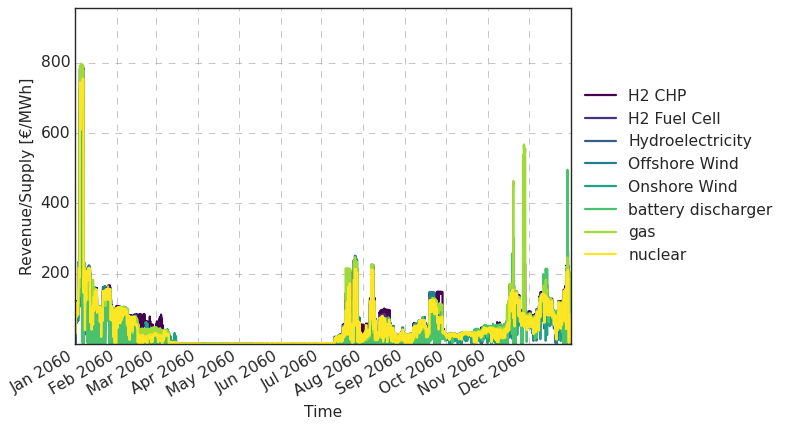

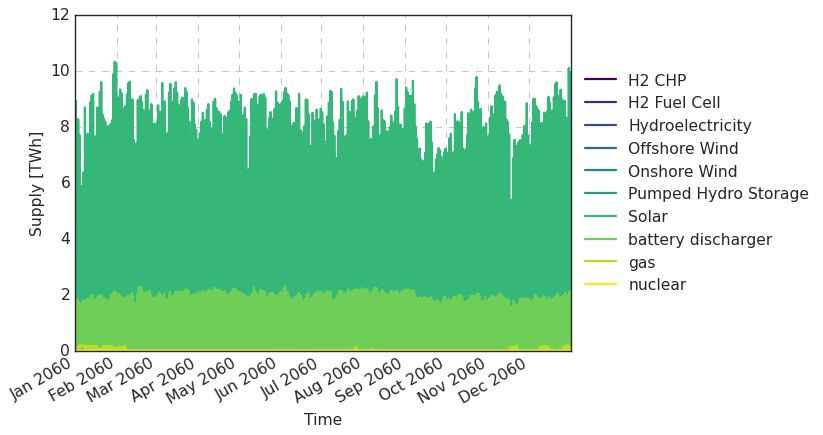

In [303]:
rev_and_exp = n.statistics.revenue(bus_carrier="AC", aggregate_time=False).fillna(0).groupby(level=1).sum().T
prod = n.statistics.energy_balance(bus_carrier="AC", aggregate_time=False).fillna(0)
prod = prod[~(prod<=0).all(axis=1)]
prod=prod.clip(lower=1e-5).groupby(level=1).sum().T
hourly_price = rev_and_exp.clip(lower=0)/prod
hourly_price = hourly_price.loc[:,(hourly_price>0).all(axis=0)]
ax = hourly_price.plot(logy=False, cmap = "viridis")
ax.set_ylim([1, hourly_price.max().max()*1.2])
ax.set_ylabel("Revenue/Supply [€/MWh]")
ax.set_xlabel("Time")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = (prod/1e6).plot(cmap="viridis", logy=False)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Carrier", ncol=2)
ax2.set_ylabel("Supply [TWh]")
ax2.set_xlabel("Time")
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

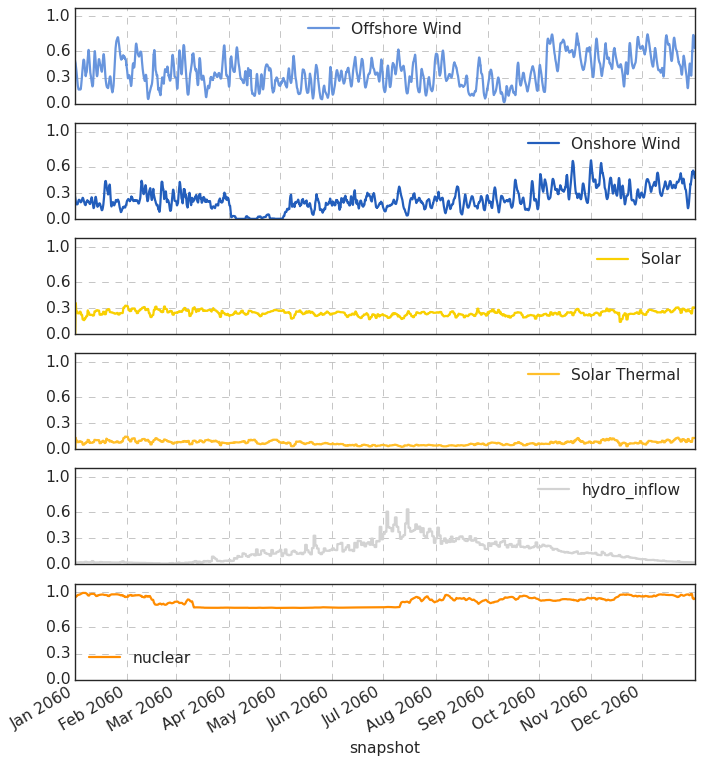

In [304]:
colors_lowered = {k.lower().rstrip():v for k,v in config["plotting"]["tech_colors"].items()}
cap_colors = {k: colors_lowered.get(k.lower().rstrip(), "lightgrey") for k in [c for c in capacity_factors.columns]}

# Apply rolling moving average filter
capacity_factors_smoothed = capacity_factors.rolling(window=24, min_periods=1).mean()

axes = capacity_factors_smoothed.dropna(axis=1, how="all").fillna(0).plot(subplots=True, figsize=(10,12), color= cap_colors)
for ax in axes:
    ax.set_ylim([0,1.1])
    ax.set_yticks([0,0.3, 0.6,1])

# Pypsa eur

# Plot time series (dev sandbox)

Text(0, 0.5, 'GW')

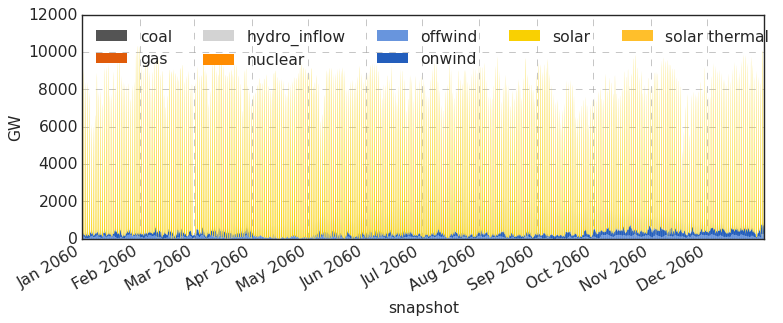

In [305]:
p_by_carrier = n.generators_t.p.T.groupby(n.generators.carrier).sum().T.div(1e3)
fig, ax = plt.subplots(figsize=(11, 4))

p_by_carrier.plot(
    kind="area",
    ax=ax,
    linewidth=0,
    # cmap="tab20b",
    color = p_by_carrier.columns.map(n.carriers.color),
)

ax.legend(ncol=5, loc="upper left", frameon=False)

ax.set_ylabel("GW")

# ax.set_ylim(0, 80);

# COSTS & prices

In [306]:
stores_inflow = n.stores_t.p.sum()
h2_stores= stores_inflow.loc[[c for c in stores_inflow.index if c.find("H2 Store")!=-1]]
h2_stores_inflow = h2_stores.where(h2_stores>0,0).sum()
h2_stores_outflow = h2_stores.where(h2_stores<0,0).sum()

# STATS

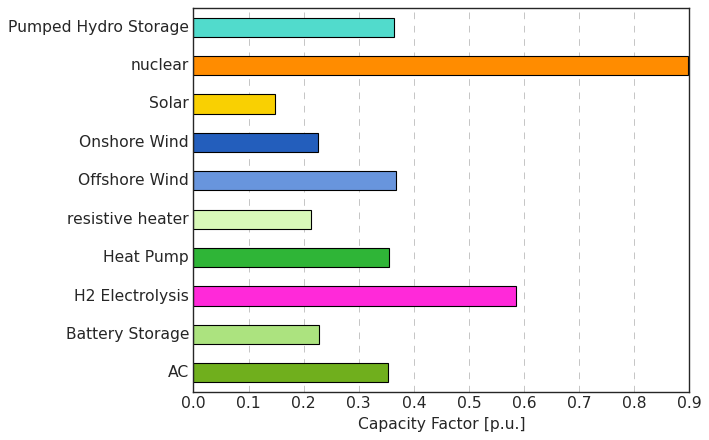

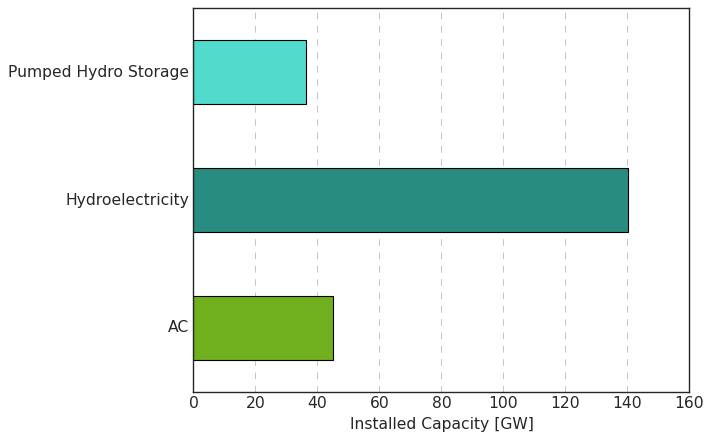

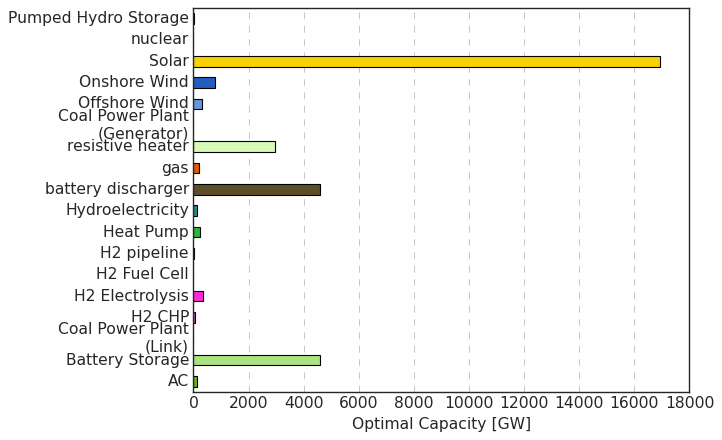

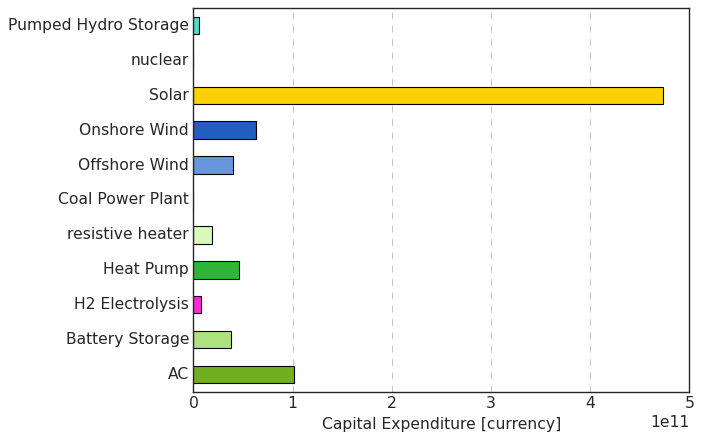

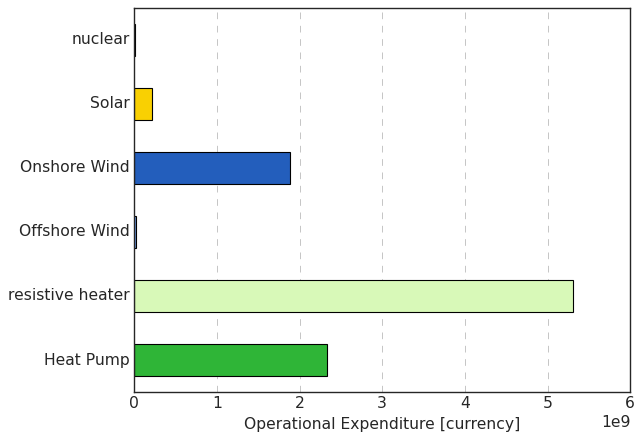

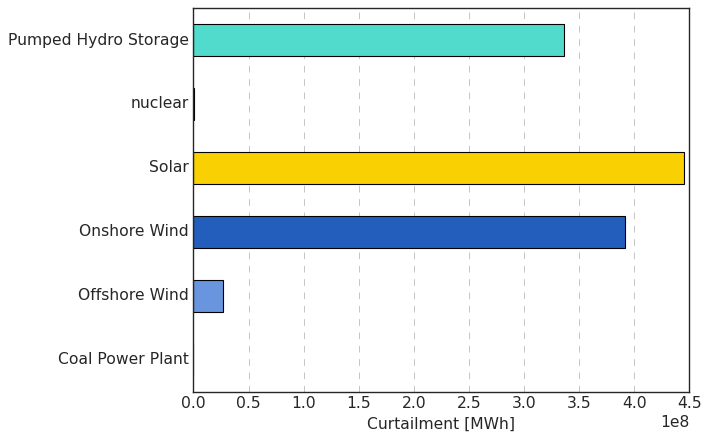

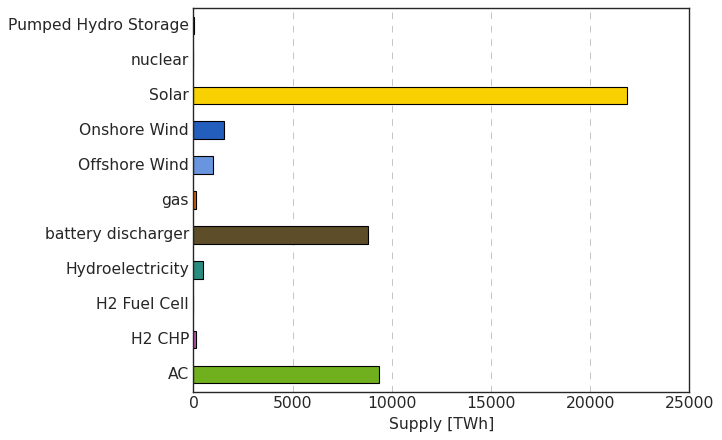

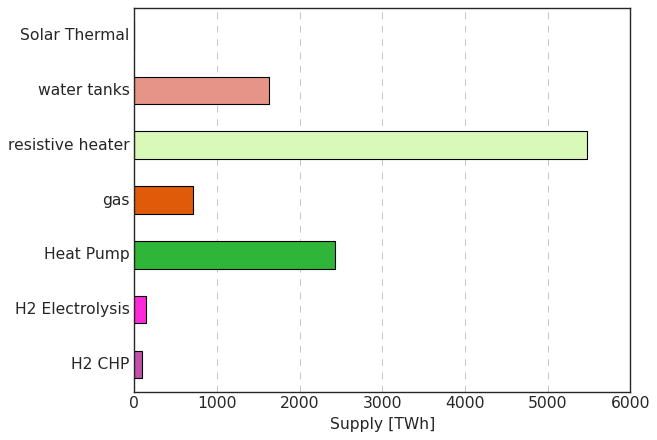

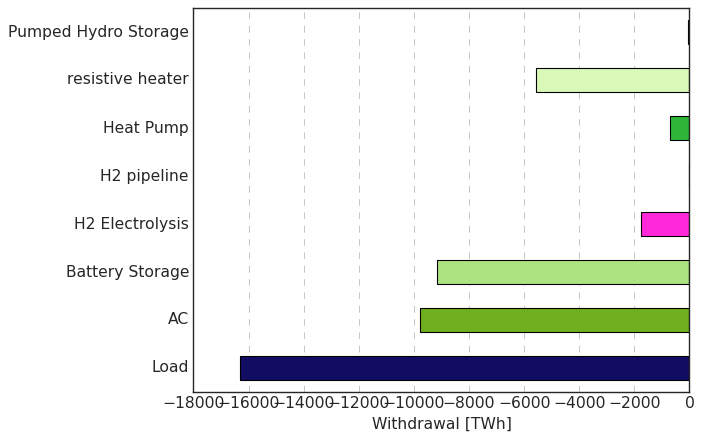

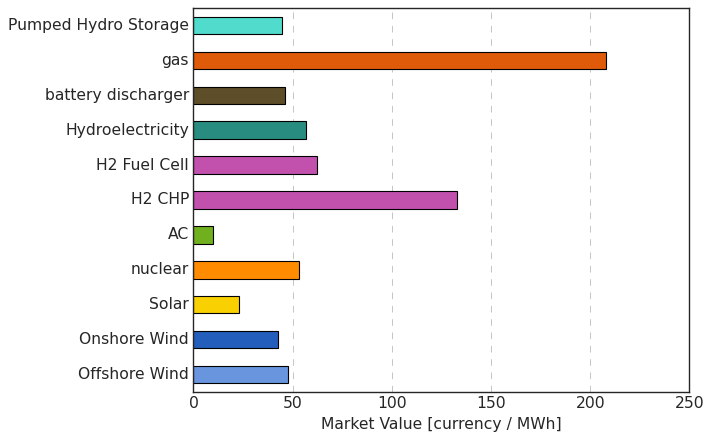

In [307]:
bus_carrier = "AC"
n.loads.carrier = "load"
n.carriers.loc["load", ["nice_name", "color"]] = "Load", "#110d63"
colors = n.carriers.set_index("nice_name").color.where(
    lambda s: s != "", "lightgrey"
)

def rename_index(ds):
    specific = ds.index.map(lambda x: f"{x[1]}\n({x[0]})")
    generic = ds.index.get_level_values("carrier")
    duplicated = generic.duplicated(keep=False)
    index = specific.where(duplicated, generic)
    return ds.set_axis(index)

def plot_static_per_carrier(ds, ax, drop_zero=True):
    if drop_zero:
        ds = ds[ds != 0]
    ds = ds.dropna()
    c = colors[ds.index.get_level_values("carrier")]
    ds = ds.pipe(rename_index)
    label = f"{ds.attrs['name']} [{ds.attrs['unit']}]"
    ds.plot.barh(color=c.values, xlabel=label, ax=ax)
    ax.grid(axis="y")

fig, ax = plt.subplots()
ds = n.statistics.capacity_factor(bus_carrier=bus_carrier).dropna()
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.installed_capacity(bus_carrier=bus_carrier).dropna()
if "Line" in ds.index:
    ds = ds.drop("Line")
ds = ds.drop(("Generator", "Load"), errors="ignore")
ds = ds / 1e3
ds.attrs["unit"] = "GW"
plot_static_per_carrier(ds.abs(), ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.optimal_capacity(bus_carrier=bus_carrier)
if "Line" in ds.index:
    ds = ds.drop("Line")
ds = ds.drop(("Generator", "Load"), errors="ignore")
ds = ds.abs() / 1e3
ds.attrs["unit"] = "GW"
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.capex(bus_carrier=bus_carrier)
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.opex(bus_carrier=bus_carrier)
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.curtailment(bus_carrier=bus_carrier)
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.supply(bus_carrier=bus_carrier)
if "Line" in ds.index:
    ds = ds.drop("Line")
ds = ds / 1e6
ds.attrs["unit"] = "TWh"
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.supply(bus_carrier="heat")
if "Line" in ds.index:
    ds = ds.drop("Line")
ds = ds / 1e6
ds.attrs["unit"] = "TWh"
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.withdrawal(bus_carrier=bus_carrier)
if "Line" in ds.index:
    ds = ds.drop("Line")
ds = ds / -1e6
ds.attrs["unit"] = "TWh"
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.market_value(bus_carrier=bus_carrier)
plot_static_per_carrier(ds, ax)
plt.show()

In [308]:
n.buses

v_nom type           x          y  carrier unit  \
Bus                                                                 
Anhui               1.0       117.231214  31.796579       AC        
Beijing             1.0       116.405232  40.171602       AC        
Chongqing           1.0       107.854783  30.041861       AC        
Fujian              1.0       117.967146  26.064535       AC        
Gansu               1.0       101.043962  37.694414       AC        
...                 ...  ...         ...        ...      ...  ...   
Tianjin battery     1.0       117.317074  39.292560  battery        
Tibet battery       1.0        88.163340  31.620638  battery        
Xinjiang battery    1.0        85.089587  40.855665  battery        
Yunnan battery      1.0       101.474773  24.939398  battery        
Zhejiang battery    1.0       120.069427  29.164586  battery        

                  v_mag_pu_set  v_mag_pu_min  v_mag_pu_max control generator  \
Bus                                                                            
Anhui                      1.0           0.0           inf      PQ             
Beijing                    1.0           0.0           inf      PQ             
Chongqing                  1.0           0.0           inf      PQ             
Fujian                     1.0           0.0           inf      PQ             
Gansu                      1.0           0.0           inf      PQ             
...                        ...           ...           ...     ...       ...   
Tianjin battery            1.0           0.0           inf      PQ             
Tibet battery              1.0           0.0           inf      PQ             
Xinjiang battery           1.0           0.0           inf      PQ             
Yunnan battery             1.0           0.0           inf      PQ             
Zhejiang battery           1.0           0.0           inf      PQ             

                 sub_network   location  
Bus                                      
Anhui                             Anhui  
Beijing                         Beijing  
Chongqing                     Chongqing  
Fujian                           Fujian  
Gansu                             Gansu  
...                      ...        ...  
Tianjin battery                 Tianjin  
Tibet battery                     Tibet  
Xinjiang battery               Xinjiang  
Yunnan battery                   Yunnan  
Zhejiang battery               Zhejiang  

[384 rows x 13 columns]

In [309]:
n.statistics.market_value(bus_carrier="AC")

component    carrier             
Generator    Offshore Wind            47.551241
             Onshore Wind             42.424882
             Solar                    22.962006
             nuclear                  52.952087
Link         AC                        9.761786
             Battery Storage                NaN
             H2 CHP                  132.924506
             H2 Electrolysis                NaN
             H2 Fuel Cell             62.268534
             H2 pipeline                    NaN
             Heat Pump                      NaN
             Hydroelectricity         56.928079
             battery discharger       45.958087
             gas                     208.127598
             resistive heater               NaN
Load         Load                           NaN
StorageUnit  Pumped Hydro Storage     44.485710
dtype: float64

In [310]:
n.statistics.market_value(bus_carrier="AC")

component    carrier             
Generator    Offshore Wind            47.551241
             Onshore Wind             42.424882
             Solar                    22.962006
             nuclear                  52.952087
Link         AC                        9.761786
             Battery Storage                NaN
             H2 CHP                  132.924506
             H2 Electrolysis                NaN
             H2 Fuel Cell             62.268534
             H2 pipeline                    NaN
             Heat Pump                      NaN
             Hydroelectricity         56.928079
             battery discharger       45.958087
             gas                     208.127598
             resistive heater               NaN
Load         Load                           NaN
StorageUnit  Pumped Hydro Storage     44.485710
dtype: float64

In [311]:
n.statistics.market_value(groupby=pypsa.statistics.get_carrier_and_bus_carrier)

component    carrier               bus_carrier    
Generator    Offshore Wind         AC                  47.551241
             Onshore Wind          AC                  42.424882
             Solar                 AC                  22.962006
             Solar Thermal         heat                14.339600
             hydro_inflow          stations            27.961605
             nuclear               AC                  52.952087
Link         AC                    AC                   9.761786
             Battery Storage       AC                        NaN
                                   Battery Storage     29.092629
             H2 CHP                AC                 132.924506
                                   H2                        NaN
                                   heat                60.321046
             H2 Electrolysis       AC                        NaN
                                   H2                  17.842883
                                   heat

In [312]:
n.statistics.market_value(groupby=pypsa.statistics.get_carrier_and_bus_carrier, bus_carrier="AC")

component    carrier               bus_carrier
Generator    Offshore Wind         AC              47.551241
             Onshore Wind          AC              42.424882
             Solar                 AC              22.962006
             nuclear               AC              52.952087
Link         AC                    AC               9.761786
             Battery Storage       AC                    NaN
             H2 CHP                AC             132.924506
             H2 Electrolysis       AC                    NaN
             H2 Fuel Cell          AC              62.268534
             H2 pipeline           AC                    NaN
             Heat Pump             AC                    NaN
             Hydroelectricity      AC              56.928079
             battery discharger    AC              45.958087
             gas                   AC             208.127598
             resistive heater      AC                    NaN
Load         Load                  AC 

In [313]:
n.statistics.supply()

component    carrier             
Link         AC                      9.372427e+09
             Battery Storage         8.965163e+09
             H2 CHP                  1.994063e+08
             H2 Electrolysis         1.460755e+09
             H2 Fuel Cell            2.949812e+05
             H2 pipeline             1.683349e+09
             Heat Pump               2.433570e+09
             Hydroelectricity        7.802101e+08
             Sabatier                8.591444e+08
             battery discharger      8.784030e+09
             gas                     8.480129e+08
             resistive heater        5.479310e+09
             stations                2.164092e+07
             water tanks             4.980630e+09
Generator    Offshore Wind           9.996024e+08
             Onshore Wind            1.540046e+09
             Solar                   2.183587e+10
             Solar Thermal           6.888498e+04
             hydro_inflow            3.440728e+08
             nuc

# brownfield

In [314]:
ds = n.statistics.installed_capacity(bus_carrier=bus_carrier).dropna()

ds = ds[ds != 0]
ds = ds.dropna()
c = colors[ds.index.get_level_values("carrier")]
# ds = ds.pipe(rename_index)
# label = f"{ds.attrs['name']} [{ds.attrs['unit']}]"
# ds.plot.barh(color=c.values, xlabel=label, ax=ax)
# ax.grid(axis="y")
ds

component    carrier             
Link         AC                      -45039.17158
             Hydroelectricity        140322.00000
StorageUnit  Pumped Hydro Storage     36390.00000
dtype: float64

# Network topology
irrelevant as don't have lines

In [315]:
n.determine_network_topology()
n.sub_networks["n_branches"] = [
    len(sn.branches()) for sn in n.sub_networks.obj
]
n.sub_networks["n_buses"] = [len(sn.buses()) for sn in n.sub_networks.obj]

n.sub_networks



carrier         slack_bus  \
SubNetwork                              
0                AC             Anhui   
1                AC           Beijing   
2                AC         Chongqing   
3                AC            Fujian   
4                AC             Gansu   
...             ...               ...   
379         battery   Tianjin battery   
380         battery     Tibet battery   
381         battery  Xinjiang battery   
382         battery    Yunnan battery   
383         battery  Zhejiang battery   

                                                          obj  n_branches  \
SubNetwork                                                                  
0           <pypsa.components.SubNetwork object at 0x7f337...           0   
1           <pypsa.components.SubNetwork object at 0x7f337...           0   
2           <pypsa.components.SubNetwork object at 0x7f337...           0   
3           <pypsa.components.SubNetwork object at 0x7f337...           0   
4           <pypsa.components.SubNetwork object at 0x7f337...           0   
...                                                       ...         ...   
379         <pypsa.components.SubNetwork object at 0x7f337...           0   
380         <pypsa.components.SubNetwork object at 0x7f337...           0   
381         <pypsa.components.SubNetwork object at 0x7f337...           0   
382         <pypsa.components.SubNetwork object at 0x7f337...           0   
383         <pypsa.components.SubNetwork object at 0x7f337...           0   

            n_buses  
SubNetwork           
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
...             ...  
379               1  
380               1  
381               1  
382               1  
383               1  

[384 rows x 5 columns]

# EXAMPLES